# Intercepted: Analyzing Federal Wiretap Records from the US Courts
##### Author: Henry Peyronnin

In [ ]:
# Extra Packages:
!pip install missingno

## Contents
[Introduction](#Introduction)<br>
[Literature Review](#Literature-Review)<br>
[Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
[Maps](#Maps)<br>
[OLS Regression](#OLS-Regression)

## Introduction

Under Title III of The Omnibus Crime Control and Safe Streets Act of 1968 and 18 U.S.C. § 2519, The Administrative Office of the United States Courts (AO) is required to publish annual federal and state __[records](https://www.uscourts.gov/statistics-reports/analysis-reports/wiretap-reports)__ of interception orders for wire, oral, or electronic communications. For each intercept, the AO's annual report includes information on the total cost and duration, the offense under investigation, the jurisdiction, and other data. The full set of variables is listed below.
    
    State
    Jurisdiction
    AO Number
    Judge
    Prosecutor
    Offense
    Intercept Type
    Location
    Application Date
    Original Order (Days)
    Number of Extensions
    Total Length (Days)
    Installation
    Number of Days in Operation
    Average Intercepts per Day
    Number of Persons Intercepted
    Number of Incriminating Intercepts
    Total Cost in Dollars
    Other Than Manpower Cost in Dollars
    Arrests
    Trials
    Motions to Suppress Intercepts
    Persons Convicted
    Cost Related
    Results Related
    
These data reveal important information about the use of surveillance in criminal investigations. Where are wiretaps used most, and for what types of crimes are they most often deployed? How do wiretap characteristics vary by crime, geography, and time period? What underlying changes in technology, policy, or society might explain these trends? Analyzing wiretap records also allow us to gauge their efficacy of as an investigative tool. How often do wiretaps result in arrests or convictions? Do their benefits outweight their costs? The overarching objective of this report is to answer some of these questions. 



## Literature Review

The breakup of AT&T in 1982 and Bell Systems later that decade led to a period of renewed competition, growth, and innovation in the telecommunications industry. As the number of telecommunications companies proliferated and new technologies flooded the market, the FBI struggled to keep pace with these new source of complexity. Worried about how this would affect their ability to conduct surveillance, the FBI pursued legislation in Congress that would protect its wiretapping abilities from the effect of potentially disruptive technologies. The FBI's argument in favor of legislative protection rested on a key unstated assumption: that wiretaps are indeed vital tools for law enforcement. Is this assumption indeed valid? In _Privacy on the Line_, Susan Landau and Whitfield Diffie (2010) attempt to find out by digging into the data on wiretaps. They draw mostly on records from 1988 to 1994, but also include data from 1968 to 2006. Their analysis yields insights into the efficacy of wiretaps as well as other aspects of their usage. 

When federal wiretap regulation went into effect in 1968, the majority of wiretaps (64%) were used for investigating gambling cases. Since then, however, the share of wiretaps devoted to narcotics investigations has steadily increased. In 1994, narcotics investigations accounted for 77% of all cases using electronic surveillance. As the use of electronic surveillance increasingly became concentrated on narcotics investigations, the average wiretap became longer and more costly. Between 1968 and 1994, the average cost of a wiretap rose from 1,358 to 49,478 dollars, and the length doubled from 20 to nearly 40 days (p. 209). This shift was largely due to the lengthy timelines involved in drug investigations, which can span months or years. 

Wiretaps occasionally result in large drug busts, which are often then used by advocates to defend the practice of wiretapping. It is unlikely that wiretaps actually affect the underlying problem of consumption, however, or that they are a better use of funds than alternative methods of stemming drug use (p. 211). The FBI has likewise cited the importance of wiretaps in investigations of kidnapping and domestic terrorism. Between 1968 and 1994, however, electronic surveillance only played a role in just 2-3 kidnapping cases per year, and domestic terrorism cases are more likely to be investigated under the Foreign Intelligence Surveillance Act (p. 211).

At the state level, 48 jurisdictions have laws that permit that authorize courts to issue orders for oral, wire, or electronic surveillance (AO, 2017). In 2017, the states with the most wiretaps were California, New York, Nevada, and North Carolina. Since the 1990s, California has seen a massive increase in wiretaps: from 8 in 1994 to 225 in 2017 (p. 212; AO, 2017). 

Many of the trends first observed by Landau and Diffie have continued apace in the 21st century, but two major changes in wiretapping have occured since the 1990s. First, portable devices became the most commonly wiretapped devices as people switched from landlines to mobile phones. Because portable devices increased the number of daily communications per person, the first change begot a second: the government began intercepting ever-greater volumes of communications. The number of intercepted conversations has increased from around 400,000 in 1968 to over 2 million (pp. 214-215).

Landau and Diffie note two limitations in the wiretaps data. First, due to reporting issues the data may actually underestimate the total number of intercepts installed. Second, the data lack important contextual information from the court hearings themselves, which gives an incomplete picture of the cases in question.

## Exploratory Data Analysis

In [2]:
# import libraries
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# read federal intercept data
fed17 = pd.read_csv('fedwire_2017.csv')
fed17.head()

Jurisdiction A.O. Number           Judge Attorney General or Designee  \
0  ALABAMA, MIDDLE      2017-1  ALBRITTON, III                          NaN   
1  ALABAMA, MIDDLE      2017-2  ALBRITTON, III                       BLANCO   
2  ALABAMA, MIDDLE      2017-3  ALBRITTON, III                       BLANCO   
3  ALABAMA, MIDDLE      2017-4  ALBRITTON, III                       BLANCO   
4  ALABAMA, MIDDLE      2017-5  ALBRITTON, III                       BLANCO   

           Offense   Type Location Application Date  Original Order (Days)  \
0        NARCOTICS     WC        D       02/28/2017                   30.0   
1  DRUGS - ILLEGAL  WC,TX        D       04/05/2017                   30.0   
2  DRUGS - ILLEGAL  WC,TX        D       02/28/2017                   30.0   
3  DRUGS - ILLEGAL  WC,TX        D       03/07/2017                   30.0   
4  DRUGS - ILLEGAL  WC,TX        D       04/05/2017                   30.0   

   Number of Extensions  ...  Total Cost($) Other Than Manpower Cost ($)  \
0                   0.0  ...        269,859                            0   
1                   1.0  ...            NaN                          NaN   
2                   0.0  ...            NaN                          NaN   
3                   1.0  ...            NaN                          NaN   
4                   0.0  ...            NaN                          NaN   

   Arrests  Trials Motions Granted Motions Denied Motions Pending  \
0      3.0     0.0             0.0            0.0             0.0   
1      NaN     NaN             NaN            NaN             NaN   
2      NaN     NaN             NaN            NaN             NaN   
3      NaN     NaN             NaN            NaN             NaN   
4      NaN     NaN             NaN            NaN             NaN   

  Persons Convicted Cost Related  Results Related  
0               0.0          NaN              NaN  
1               NaN          NaN              NaN  
2               NaN          NaN              NaN  
3               NaN          NaN              NaN  
4               NaN          NaN              NaN  

[5 rows x 27 columns]

In [4]:
# a quick look at variables and data types 
fed17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 27 columns):
Jurisdiction                          3026 non-null object
A.O. Number                           3026 non-null object
Judge                                 3026 non-null object
Attorney General or Designee          992 non-null object
Offense                               3024 non-null object
Type                                  3026 non-null object
Location                              3026 non-null object
Application Date                      3026 non-null object
Original Order (Days)                 3019 non-null float64
Number of Extensions                  3026 non-null float64
Total Length (Days)                   3026 non-null float64
Installation                          3026 non-null object
Number of Days in Operation           1718 non-null float64
Avg. Intercepts Per Day               1688 non-null float64
Number of Persons Intercepts          1686 non-null object
Numb

In [5]:
# summarize data
fed17.describe()

Original Order (Days)  Number of Extensions  Total Length (Days)  \
count            3019.000000           3026.000000          3026.000000   
mean               29.836038              0.522802            45.279247   
std                 1.663931              1.097996            32.928960   
min                 0.000000              0.000000             0.000000   
25%                30.000000              0.000000            30.000000   
50%                30.000000              0.000000            30.000000   
75%                30.000000              1.000000            60.000000   
max                30.000000             16.000000           510.000000   

       Number of Days in Operation  Avg. Intercepts Per Day      Arrests  \
count                  1718.000000              1688.000000  1633.000000   
mean                     41.833527               414.114336     2.357012   
std                      33.149863             12546.685926     7.362417   
min                       0.000000                 0.000000     0.000000   
25%                      29.000000                 2.000000     0.000000   
50%                      30.000000                34.000000     0.000000   
75%                      58.000000               115.250000     0.000000   
max                     510.000000            515477.000000   130.000000   

            Trials  Motions Granted  Motions Denied  Motions Pending  \
count  1619.000000      1621.000000     1621.000000      1621.000000   
mean      0.017912         0.046885        0.024059         0.001234   
std       0.318836         1.233393        0.641209         0.035115   
min       0.000000         0.000000        0.000000         0.000000   
25%       0.000000         0.000000        0.000000         0.000000   
50%       0.000000         0.000000        0.000000         0.000000   
75%       0.000000         0.000000        0.000000         0.000000   
max      11.000000        40.000000       25.000000         1.000000   

       Persons Convicted  
count        1619.000000  
mean            0.362569  
std             2.941558  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max            70.000000

This table is missing data for many variables because they have been expressed as non-numeric data types. However, there are a few statistics worth noting:

    Avg. wiretap length: 45 days
    Mean intercepts per day: 414
    Mean arrests: 2.35
    Mean persons convicted: .36

Mean convictions and arrests seem pretty low. Are they worth the time and expense per wiretap? Before we can answer this question, we must convert columns such as "Total Cost" from object to numeric data types. This requires dealing with missing values. 

### Check for missing values

In [6]:
# number of missing values per column
fed17.isnull().sum()

Jurisdiction                             1
A.O. Number                              1
Judge                                    1
Attorney General or Designee          2035
Offense                                  3
Type                                     1
Location                                 1
Application Date                         1
Original Order (Days)                    8
Number of Extensions                     1
Total Length (Days)                      1
Installation                             1
Number of Days in Operation           1309
Avg. Intercepts Per Day               1339
Number of Persons Intercepts          1341
Number of Intercepts                  1330
Number of Incriminating Intercepts    1330
Total Cost($)                         1449
Other Than Manpower Cost ($)          1447
Arrests                               1394
Trials                                1408
Motions Granted                       1406
Motions Denied                        1406
Motions Pen

In [7]:
# missingno is a Python library that provides a visual representation of missing values in a dataset
import missingno as msno

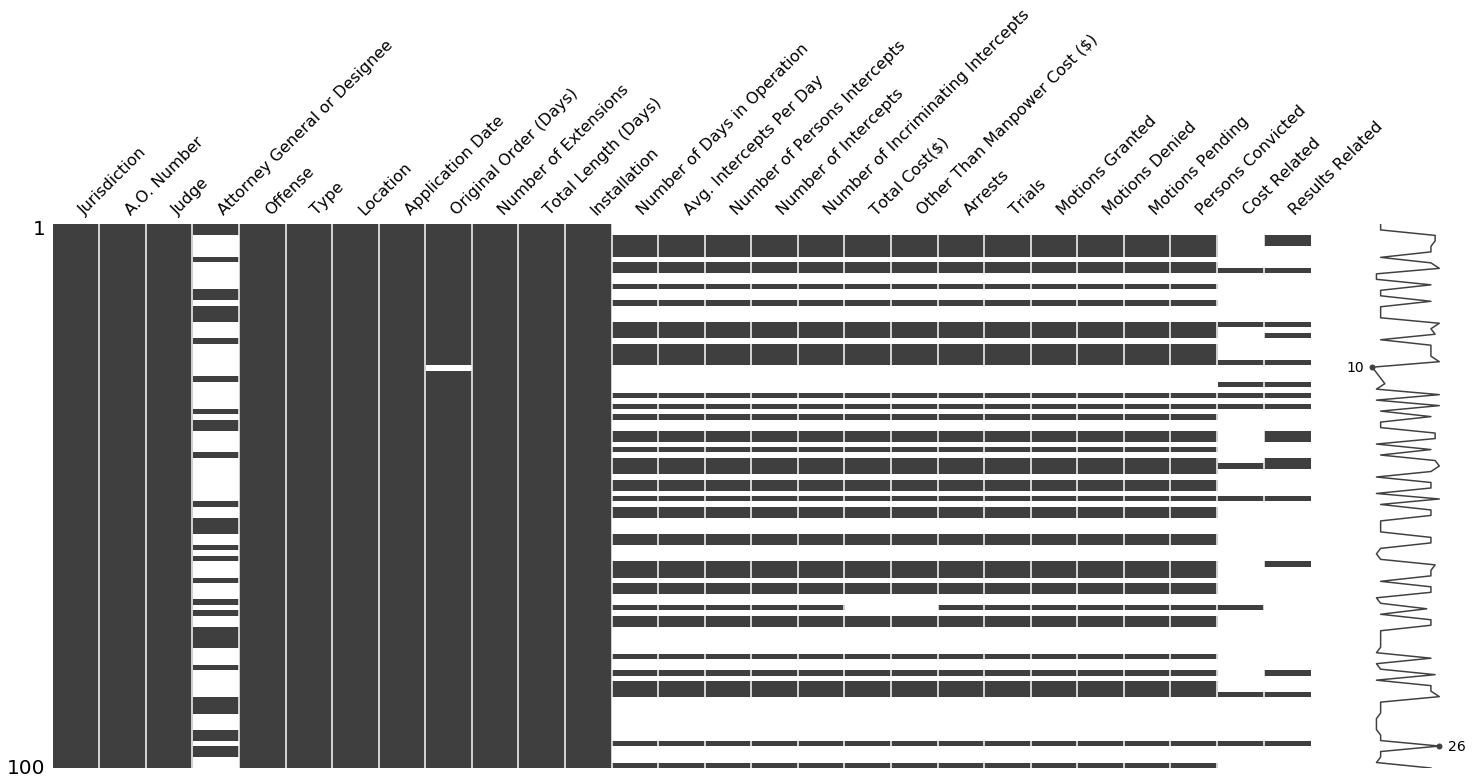

In [8]:
# Missing values matrix: random sample of 100 observations
msno.matrix(fed17.sample(100))

The visualization above shows see the number of missing values per column. We only have consistent data for some of the variables: Jurisdiction, AO Number, Judge, Offense, Type, Location, Application Date, Original Order, Number of Extensions, Total Length, and Installation. From _Number of Days in Operation_ to _Results Related_, many of the observations are missing values. Why are so many values missing for these columns? The most likely explanation is that the missing values are from wiretaps for which no prosecutor report was filed. 

In [9]:
# How many wiretaps were reported by the prosecutor?
fed17['Installation'].value_counts()

INSTALLED AND USED      1721
NO PROSECUTOR REPORT    1283
NEVER INSTALLED           22
Name: Installation, dtype: int64

In [10]:
# First I will get rid of 'never installed' wiretaps, since they do not provide 
# useful statistical information
fed17 = fed17[fed17.Installation != 'NEVER INSTALLED']

In [11]:
# very few records report AG or designee, so drop this column
fed17 = fed17.drop('Attorney General or Designee', axis=1)

In [12]:
# New dataframe: include only taps without prosecutor reports
fed_no = fed17.loc[fed17['Installation'] == 'NO PROSECUTOR REPORT']

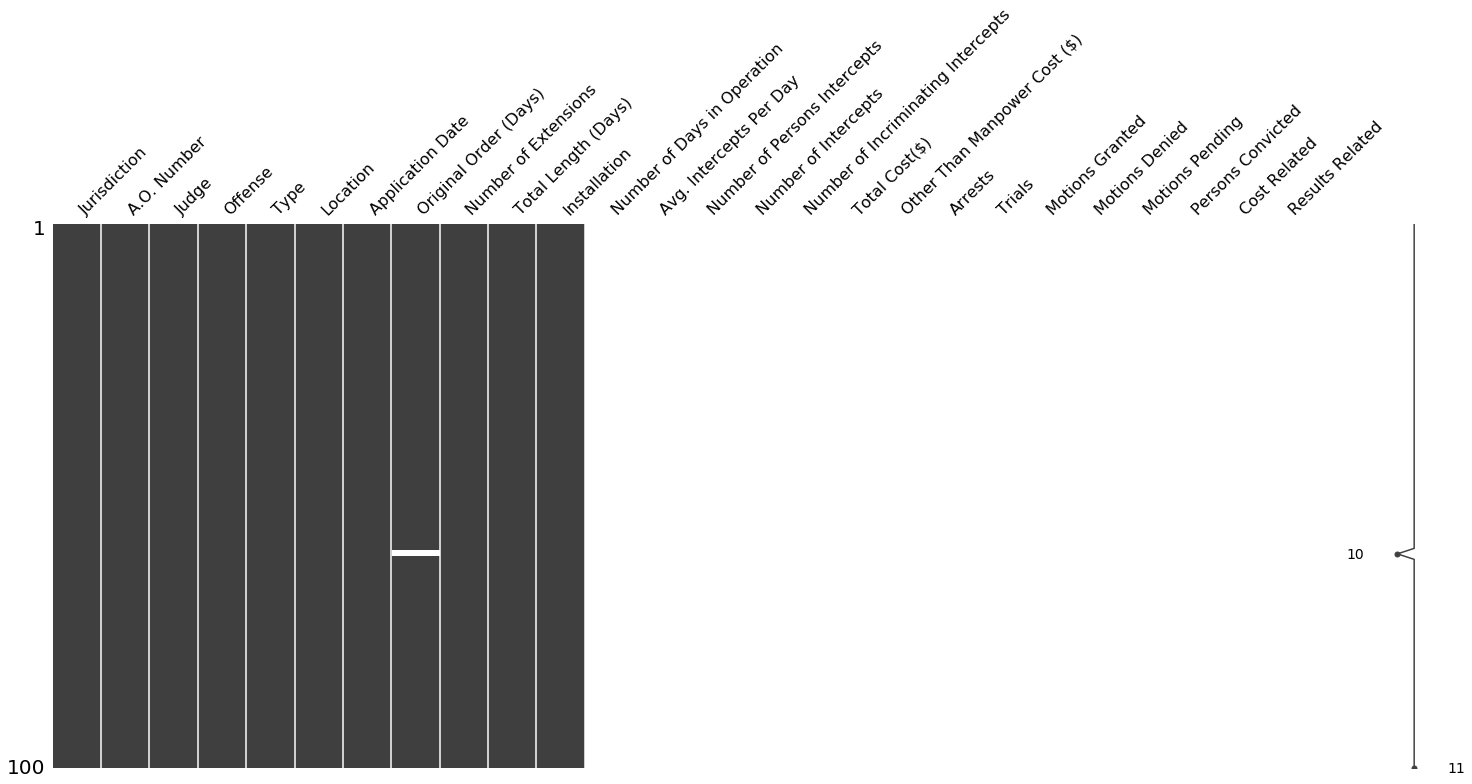

In [13]:
# check missing values
msno.matrix(fed_no.sample(100))

The missing values matrix above shows missing values for only the wiretaps that had no prosecutor report. The pattern of missing values in our full dataset stems from the fact that data for these variables were not submitted by the prosecutor, as the missing values matrix makes clear. 

Among the jurisdictions where prosecutor reports were not submitted, which rank the highest?

In [14]:
fed_no['Jurisdiction'].value_counts()

TEXAS, SOUTHERN            86
CALIFORNIA, CENTRAL        85
ARIZONA                    82
COLORADO                   64
MISSOURI, EASTERN          51
NEW YORK, SOUTHERN         50
NEW JERSEY                 48
ILLINOIS, NORTHERN         40
CONNECTICUT                34
PENNSYLVANIA, WESTERN      30
CALIFORNIA, SOUTHERN       29
LOUISIANA, EASTERN         29
TEXAS, WESTERN             27
OKLAHOMA, WESTERN          27
UTAH                       27
DISTRICT OF COLUMBIA       21
MARYLAND                   20
FLORIDA, MIDDLE            20
KANSAS                     19
CALIFORNIA, NORTHERN       18
ARKANSAS, EASTERN          18
OHIO, SOUTHERN             17
INDIANA, SOUTHERN          16
SOUTH CAROLINA             16
PENNSYLVANIA, MIDDLE       15
FLORIDA, SOUTHERN          15
OREGON                     15
NEW YORK, NORTHERN         15
MISSOURI, WESTERN          14
MISSISSIPPI, SOUTHERN      14
                           ..
WASHINGTON, WESTERN         8
NEVADA                      7
TENNESSEE,

For each jurisdiction, what percentage of total wiretaps were not accompanied by a prosecutor report?

In [15]:
percent = fed17.groupby(['Jurisdiction'])['Installation'].value_counts(normalize=True, ascending = False) * 100

In [16]:
percent = percent.unstack(level=1)

In [17]:
percent = percent.fillna(0)
percent = percent.round(1)

In [18]:
percent.sort_values(by='NO PROSECUTOR REPORT', ascending=False)

Installation             INSTALLED AND USED  NO PROSECUTOR REPORT
Jurisdiction                                                     
WEST VIRGINIA, NORTHERN                 0.0                 100.0
PENNSYLVANIA, MIDDLE                   11.8                  88.2
ALABAMA, MIDDLE                        16.7                  83.3
MONTANA                                16.7                  83.3
NORTH CAROLINA, MIDDLE                 20.0                  80.0
MICHIGAN, WESTERN                      23.1                  76.9
NEW JERSEY                             23.8                  76.2
VIRGINIA, WESTERN                      25.0                  75.0
NEW YORK, WESTERN                      25.0                  75.0
ALABAMA, SOUTHERN                      25.0                  75.0
WEST VIRGINIA, SOUTHERN                28.6                  71.4
COLORADO                               31.9                  68.1
PENNSYLVANIA, WESTERN                  33.3                  66.7
ILLINOIS, SOUTHERN                     33.3                  66.7
OKLAHOMA, NORTHERN                     33.3                  66.7
CONNECTICUT                            35.8                  64.2
TENNESSEE, MIDDLE                      36.4                  63.6
ARKANSAS, WESTERN                      36.8                  63.2
TENNESSEE, EASTERN                     37.5                  62.5
OREGON                                 37.5                  62.5
MISSOURI, EASTERN                      37.8                  62.2
MISSISSIPPI, SOUTHERN                  39.1                  60.9
ARIZONA                                39.3                  60.7
ALABAMA, NORTHERN                      40.0                  60.0
UTAH                                   40.0                  60.0
RHODE ISLAND                           42.9                  57.1
OKLAHOMA, WESTERN                      43.8                  56.2
KANSAS                                 44.1                  55.9
LOUISIANA, EASTERN                     44.2                  55.8
MINNESOTA                              45.5                  54.5
...                                     ...                   ...
MISSISSIPPI, NORTHERN                  66.7                  33.3
WISCONSIN, EASTERN                     66.7                  33.3
WASHINGTON, EASTERN                    66.7                  33.3
HAWAII                                 66.7                  33.3
INDIANA, SOUTHERN                      68.0                  32.0
KENTUCKY, EASTERN                      69.2                  30.8
WASHINGTON, WESTERN                    69.2                  30.8
NEW MEXICO                             69.2                  30.8
ILLINOIS, NORTHERN                     69.5                  30.5
MARYLAND                               69.7                  30.3
TEXAS, WESTERN                         70.3                  29.7
GEORGIA, SOUTHERN                      70.4                  29.6
GEORGIA, NORTHERN                      72.9                  27.1
FLORIDA, SOUTHERN                      74.6                  25.4
LOUISIANA, WESTERN                     78.3                  21.7
NEW YORK, EASTERN                      79.1                  20.9
FLORIDA, NORTHERN                      80.0                  20.0
GEORGIA, MIDDLE                        85.7                  14.3
CALIFORNIA, SOUTHERN                   86.4                  13.6
MASSACHUSETTS                          87.1                  12.9
OHIO, NORTHERN                         88.5                  11.5
TEXAS, NORTHERN                        90.6                   9.4
NORTH CAROLINA, EASTERN                92.3                   7.7
VIRGINIA, EASTERN                      96.6                   3.4
IDAHO                                 100.0                   0.0
LOUISIANA, MIDDLE                     100.0                   0.0
IOWA, SOUTHERN                        100.0                   0.0
CALIFORNIA, EASTERN                   10

Now we know which jurisdictions submitted the fewest prosecutor reports as a percentage of the total. The AO explains that reports may be missing because "some prosecutors may have delayed filing reports to avoid jeopardizing ongoing investigations. Some of the prosecutors’ reports require additional information to comply with reporting requirements or were received too late to include in this document. Information about these wiretaps should appear in future reports" (AO, 2017). 

Regardless of why reports are missing, it should be noted that comparing percentages across jurisdictions may be misleading, because some jurisdictions have dozens of records while others have only several. Northern WVA is on the top of the list for percent of reports not filed, but it only ordered four wiretaps. New Jersey is near the top, but it had 63 wiretaps. 

In order to evaluate wiretaps in terms of cost, timespan, arrests, and other factors, we will have to look only at records for which a prosecutor report was filed. Before doing so, however, we will look at a few variables that are not dependent on prosecutor reporting to see what insights we might derive:

    Jurisdiction
    Type
    Offense
    Application Date


In [19]:
# Number of wiretaps per jurisdiction
fed17['Jurisdiction'].value_counts()

CALIFORNIA, SOUTHERN       213
TEXAS, SOUTHERN            189
CALIFORNIA, CENTRAL        175
ARIZONA                    135
ILLINOIS, NORTHERN         131
NEW YORK, SOUTHERN         107
COLORADO                    94
TEXAS, WESTERN              91
MISSOURI, EASTERN           82
MARYLAND                    66
NEW JERSEY                  63
FLORIDA, SOUTHERN           59
CONNECTICUT                 53
OHIO, NORTHERN              52
LOUISIANA, EASTERN          52
INDIANA, SOUTHERN           50
GEORGIA, NORTHERN           48
OKLAHOMA, WESTERN           48
FLORIDA, MIDDLE             46
UTAH                        45
PENNSYLVANIA, WESTERN       45
DISTRICT OF COLUMBIA        44
NEW YORK, EASTERN           43
SOUTH CAROLINA              40
NEW MEXICO                  39
NEW YORK, NORTHERN          38
ARKANSAS, EASTERN           37
CALIFORNIA, NORTHERN        37
OHIO, SOUTHERN              34
KANSAS                      34
                          ... 
ALABAMA, NORTHERN           15
WEST VIR

In [20]:
#Number of wiretaps per offense
fed17['Offense'].value_counts()

NARCOTICS               1822
DRUGS - ILLEGAL          525
CONSPIRACY               422
RACKETEERING              33
$LAUNDERING               32
OTHER                     28
CORRUPTION                21
FRAUD                     20
MURDER                    18
DRUGS - PRESCRIPTION      15
FIREARMS                  13
BRIBERY                   11
POSSESSION                 8
GAMBLING                   6
EXTORTION                  5
KIDNAPPING                 5
ROBBERY                    3
SMUGGLING                  2
LOANSHARKING               2
IMMIGRATION                2
TERRORISM                  2
EMBEZZLEMENT               1
ASSAULT                    1
USURY                      1
THEFT                      1
CIVIL RIGHTS               1
COERCION                   1
BOMBING                    1
Name: Offense, dtype: int64

In [21]:
#Number of wiretaps by type
fed17['Type'].value_counts()

WC,TX          1247
WC             1152
TX              220
WC,EO            59
WC,TX,EO         59
EO               40
TX,EO            37
WC,WS            30
AP               28
WC,WO,TX         23
WC,OM,TX         19
WC,EE,TX,AP      17
OM                9
WS                8
WC,TX,AP          8
WC,OM             6
WC,OO,TX          5
EE                4
WO,TX             4
OO                4
-99               3
WC,WS,TX          3
WC,AP             3
WC,AP,EO          2
TX,AP             2
OM,EO             2
WC,EE             2
WO                2
OM,OO             2
WC,OO             1
WC,WO             1
WC,WO,EO          1
WS,TX             1
Name: Type, dtype: int64

Data Definitions for Wiretap Type: 

    WC = Cellular or Mobile Telephone (Wire)
    WS = Standard Telephone (Wire)
    WO = Other (Wire)
    OM = Microphone (Oral)
    OO = Other (Oral)
    AP = App (Electronic)
    ED = Digital Pager (Electronic)
    EE = Computer or E-Mail (Electronic)
    EF = Fax Machine (Electronic)
    EO = Other (Electronic)
    TX = Text Message (Electronic)

Almost all wiretap orders are for cell phones and/or text messages. 

#### Does the number of wiretap orders vary by month?

In [22]:
# want to get wiretap counts per month for 2017
# first need to convert date column to datetime format
fed17['Application Date'] = pd.to_datetime(fed17['Application Date'])

In [23]:
# extract year and month
fed17['year'] = pd.DatetimeIndex(fed17['Application Date']).year
fed17['month'] = pd.DatetimeIndex(fed17['Application Date']).month

In [24]:
# create plot with monthly value counts
plot = pd.DataFrame(fed17.loc[fed17['year'] == 2017].month.value_counts())
plot.reset_index(level=0, inplace=True)
plot = plot.sort_values(by='index', ascending=True)

In [25]:
# rename columns for plot
plot = plot.rename(columns={"index": "month", "month": "count"})
plot.head()

month  count
5    1.0    162
3    2.0    191
0    3.0    232
2    4.0    194
1    5.0    199

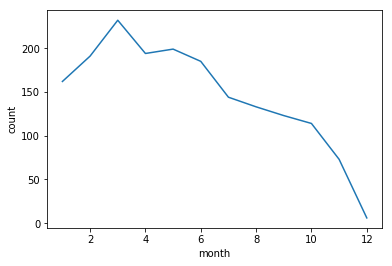

In [26]:
# show plot
sns.lineplot(x='month', y = 'count', data=plot)

Wiretap orders peaked in March 2017 and then steadily declined through December. This trend likely reflects the availability of resources for federal law enforcement, which is contingent on federal budgeting.

#### Wiretaps for which prosecutor reports were filed

In [27]:
# New dataframe: keep only records that were reported
fed_rep = fed17.loc[fed17['Installation'] == 'INSTALLED AND USED']

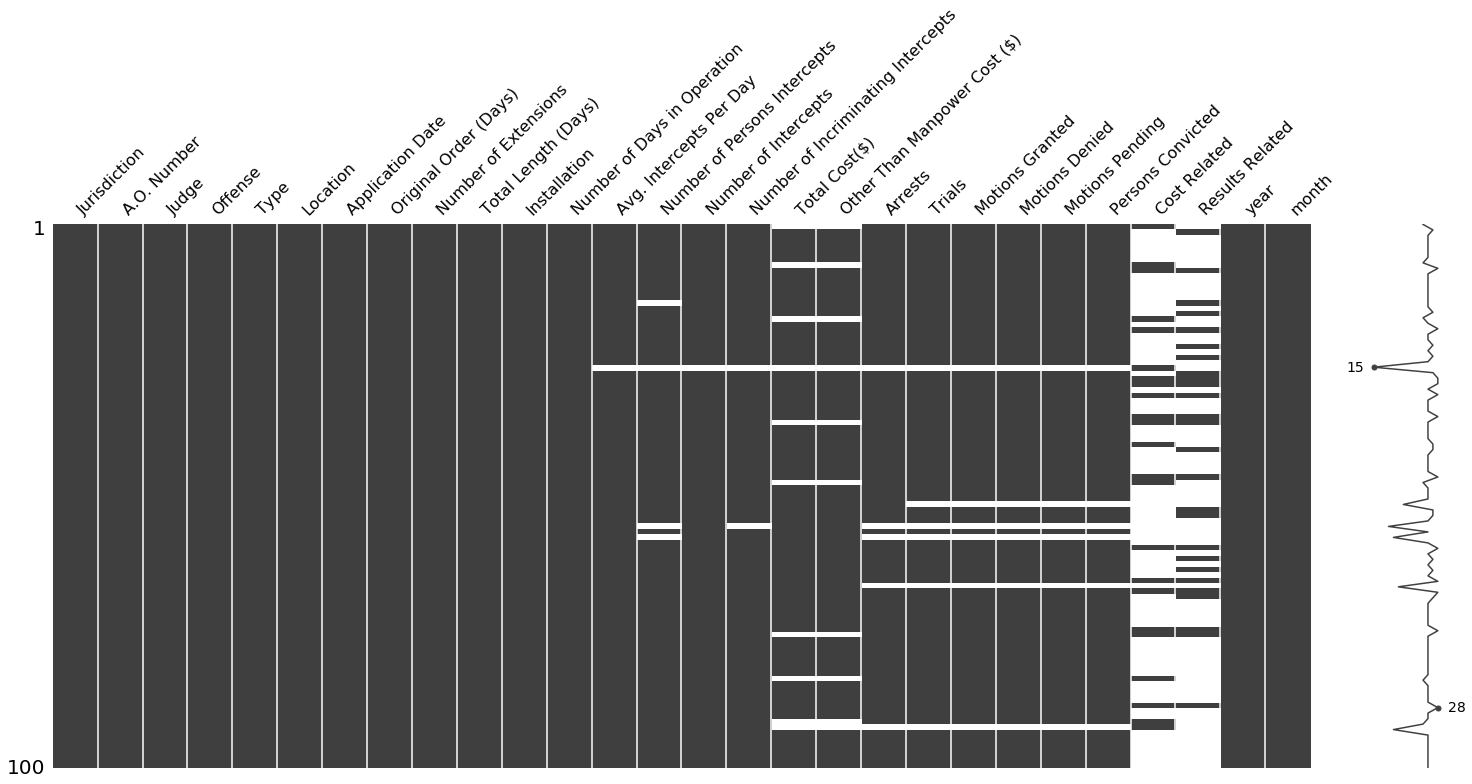

In [28]:
msno.matrix(fed_rep.sample(100))

Data still patchy in some places, but for the most part we have complete records

In [29]:
# Which criminal investigations involve the longest wiretaps?
fed_rep.groupby('Offense')['Total Length (Days)'].mean()

Offense
$LAUNDERING         48.461538
BRIBERY             66.666667
CIVIL RIGHTS        30.000000
COERCION            90.000000
CONSPIRACY          46.480519
CORRUPTION         132.000000
DRUGS - ILLEGAL     73.333333
EMBEZZLEMENT        30.000000
EXTORTION          120.000000
FIREARMS            37.500000
FRAUD               62.142857
GAMBLING           108.000000
IMMIGRATION         30.000000
KIDNAPPING          30.000000
LOANSHARKING        75.000000
MURDER              76.153846
NARCOTICS           44.137475
OTHER               51.000000
POSSESSION          52.500000
RACKETEERING        47.500000
ROBBERY             30.000000
SMUGGLING           30.000000
THEFT               60.000000
USURY               60.000000
Name: Total Length (Days), dtype: float64

2017 data doesn't fit Landau and Diffy's assertion that wiretaps for drug investigations last longer than those for other crimes, at least for federal investigations. Gambling and corruption-related wiretaps last much longer.

In [30]:
fed_rep['Total Cost($)'] = fed_rep['Total Cost($)'].str.replace(',','')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
fed_rep.to_csv('fed_rep.csv')

## Maps

In [32]:
# load mapping libraries
import geopandas as gpd
import pysal as ps
from pysal.contrib.viz import mapping as maps
import palettable as pltt
from seaborn import palplot

In [33]:
# create link to file directory
jur_dir = 'US_District_Court_Jurisdictions/'
#call file
court_jur = jur_dir + 'US_District_Court_Jurisdictions.shp'
#read shapefile with geopandas
jur = gpd.read_file(court_jur)
jur.set_index('DISTRICT')

FID ABBR      SQ_Miles  Shape_Leng  Shape_Area  \
DISTRICT                                                                   
ALABAMA MIDDLE              1  ALM  1.557104e+04    9.918902    3.851034   
ALABAMA NORTHERN            2  ALN  2.279241e+04   12.526683    5.752874   
ALABAMA SOUTHERN            3  ALS  3.672870e+04   14.291408    3.267182   
ALASKA                      4   AK  2.130451e+07  787.366223  279.696379   
ARIZONA                     5   AZ  1.140598e+05   23.752602   28.930993   
ARKANSAS EASTERN            6  ARE  2.887509e+04   20.282134    7.391100   
ARKANSAS WESTERN            7  ARW  2.429224e+04   17.572698    6.190137   
CALIFORNIA CENTRAL          8  CAC  7.773755e+04   26.141797   10.235889   
CALIFORNIA EASTERN          9  CAE  9.178595e+04   32.204502   23.632805   
CALIFORNIA NORTHERN        10  CAN  2.673482e+04   29.120485    5.579357   
CALIFORNIA SOUTHERN        11  CAS  1.302978e+04    8.844054    2.191518   
COLORADO                   12   CO  1.040584e+05   22.031328   28.054360   
CONNECTICUT                13   CT  5.657781e+03    7.065003    1.393128   
DELAWARE                   14   DE  2.048253e+03    5.457967    0.552171   
DISTRICT OF COLUMBIA       15   DC  6.015800e+01    0.716060    0.016194   
FLORIDA MIDDLE             16  FLM  1.658333e+05   52.002268    6.976722   
FLORIDA NORTHERN           17  FLN  8.085151e+04   31.026591    4.136558   
FLORIDA SOUTHERN           18  FLS  1.643553e+05   26.857592    2.399556   
GEORGIA MIDDLE             19  GAM  2.514655e+04   17.223128    6.224920   
GEORGIA NORTHERN           20  GAN  1.448429e+04   10.058370    3.664506   
GEORGIA SOUTHERN           21  GAS  3.158373e+04   22.657038    4.745704   
HAWAII                     22   HI  1.251206e+04   14.655890    1.449421   
IDAHO                      23   ID  8.339463e+04   29.686713   24.456865   
ILLINOIS CENTRAL           24  ILC  2.873903e+04   14.305483    7.894371   
ILLINOIS SOUTHERN          25  ILS  1.665294e+04   14.690890    4.450294   
INDIANA NORTHERN           26  INN  1.344806e+04    9.512025    3.735276   
INDIANA SOUTHERN           27  INS  2.271327e+04   14.576477    6.141331   
IOWA NORTHERN              28  IAN  3.097177e+04   18.512013    8.825879   
IOWA SOUTHERN              29  IAS  2.525273e+04   17.607201    7.042830   
KANSAS                     30   KS  8.222810e+04   21.349084   22.007447   
...                       ...  ...           ...         ...         ...   
OREGON                     65   OR  1.112276e+05   32.263079   28.140968   
PENNSYLVANIA EASTERN       66  PAE  4.766876e+03    6.170629    1.308281   
PENNSYLVANIA MIDDLE        67  PAM  2.129589e+04   14.248610    5.911726   
PENNSYLVANIA WESTERN       68  PAW  1.916885e+04   11.336522    5.311254   
PUERTO RICO                69   PR  4.235475e+03    7.711394    0.764548   
RHODE ISLAND               70   RI  1.896307e+03    5.895388    0.306881   
SOUTH CAROLINA             71   SC  5.060914e+04   24.276642    7.802899   
SOUTH DAKOTA               72   SD  7.696602e+04   23.271515   22.580292   
TENNESSEE EASTERN          73  TNE  1.653215e+04   14.502888    4.270485   
TENNESSEE MIDDLE           74  TNM  1.429762e+04   11.867564    3.702203   
TENNESSEE WESTERN          75  TNW  1.179143e+04    9.980872    2.919934   
TEXAS EASTERN              76  TXE  3.377511e+04   23.679032    8.354699   
TEXAS NORTHERN             77  TXN  9.678938e+04   32.874351   24.300239   
TEXAS SOUTHERN             78  TXS  1.031682e+05   44.860009   10.328502   
TEXAS WESTERN              79  TXW  9.147135e+04   41.498785   22.251636   
UTAH                       80   UT  8.480087e+04   19.998615   22.969884   
VERMONT                    81   VT  9.613722e+03    9.128875    2.803203   
VIRGIN ISLANDS             82   VI  7.508860e+02    2.656416    0.029757   
VIRGINIA EASTERN           83  VAE  3.418347e+04   45.533646    4.047368   
VIRGINIA WESTERN           84  VAW  2.462238e+04   19.886863    6.503469  

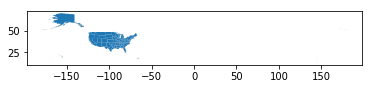

In [34]:
jur.plot()

In [35]:
# remove jurisdictions that cause scaling problems when plotting
jur = jur[jur.DISTRICT != 'GUAM']
jur = jur[jur.DISTRICT != 'ALASKA']
jur = jur[jur.DISTRICT != 'NORTHERN MARIANA ISLANDS']
jur = jur[jur.DISTRICT != 'VIRGIN ISLANDS']
jur = jur[jur.DISTRICT != 'HAWAII']
jur = jur[jur.DISTRICT != 'PUERTO RICO']
jur = jur[jur.DISTRICT != 'BERMUDA']

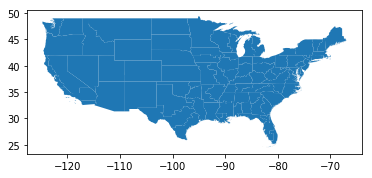

In [36]:
# scaling problem resolved, but projection looks bad
jur.plot()

In [37]:
# check dataframe and projection
jur.crs

{'init': 'epsg:4326'}

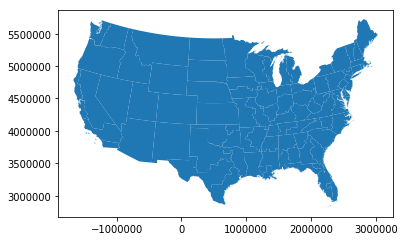

In [38]:
# Test: UTM Zone 14 projection
jur.to_crs("+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs").plot()

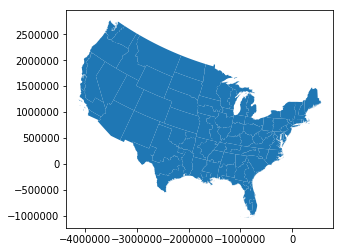

In [39]:
# Test: Massachusetts mainland projection
jur.to_crs({'init': 'epsg:2805'}).plot()

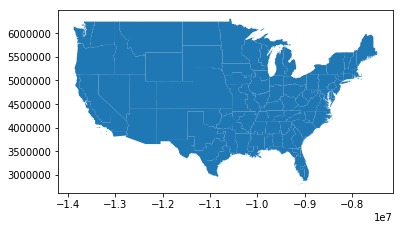

In [40]:
# Test: World Mercator projection
jur.to_crs({'init': 'epsg:3395'}).plot()

In [41]:
# Change projection to UTM Zone 14
jur = jur.to_crs("+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

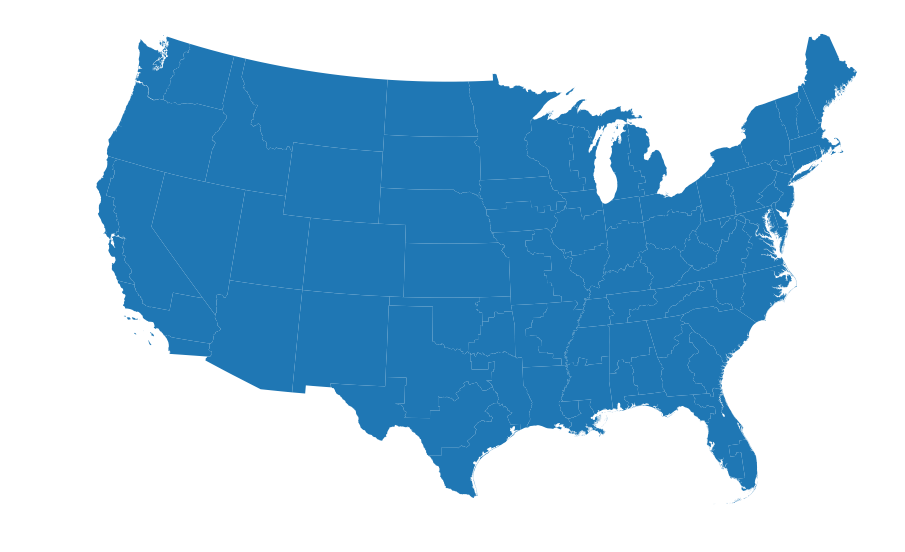

In [42]:
# Set up figure and axis with different size
f, ax = plt.subplots(1, figsize=(15,15))
# Add layer of polygons on the axis
jur.plot(ax=ax)
# Remove axis
ax.set_axis_off()
# Display
plt.show()

In [43]:
jur.reset_index()

index  FID ABBR                DISTRICT    SQ_Miles  Shape_Leng  \
0       0    1  ALM          ALABAMA MIDDLE   15571.036    9.918902   
1       1    2  ALN        ALABAMA NORTHERN   22792.411   12.526683   
2       2    3  ALS        ALABAMA SOUTHERN   36728.698   14.291408   
3       4    5   AZ                 ARIZONA  114059.824   23.752602   
4       5    6  ARE        ARKANSAS EASTERN   28875.088   20.282134   
5       6    7  ARW        ARKANSAS WESTERN   24292.235   17.572698   
6       7    8  CAC      CALIFORNIA CENTRAL   77737.552   26.141797   
7       8    9  CAE      CALIFORNIA EASTERN   91785.949   32.204502   
8       9   10  CAN     CALIFORNIA NORTHERN   26734.821   29.120485   
9      10   11  CAS     CALIFORNIA SOUTHERN   13029.776    8.844054   
10     11   12   CO                COLORADO  104058.357   22.031328   
11     12   13   CT             CONNECTICUT    5657.781    7.065003   
12     13   14   DE                DELAWARE    2048.253    5.457967   
13     14   15   DC    DISTRICT OF COLUMBIA      60.158    0.716060   
14     15   16  FLM          FLORIDA MIDDLE  165833.265   52.002268   
15     16   17  FLN        FLORIDA NORTHERN   80851.513   31.026591   
16     17   18  FLS        FLORIDA SOUTHERN  164355.334   26.857592   
17     18   19  GAM          GEORGIA MIDDLE   25146.547   17.223128   
18     19   20  GAN        GEORGIA NORTHERN   14484.294   10.058370   
19     20   21  GAS        GEORGIA SOUTHERN   31583.732   22.657038   
20     22   23   ID                   IDAHO   83394.626   29.686713   
21     23   24  ILC        ILLINOIS CENTRAL   28739.027   14.305483   
22     24   25  ILS       ILLINOIS SOUTHERN   16652.942   14.690890   
23     25   26  INN        INDIANA NORTHERN   13448.055    9.512025   
24     26   27  INS        INDIANA SOUTHERN   22713.272   14.576477   
25     27   28  IAN           IOWA NORTHERN   30971.774   18.512013   
26     28   29  IAS           IOWA SOUTHERN   25252.726   17.607201   
27     29   30   KS                  KANSAS   82228.102   21.349084   
28     30   31  KYE        KENTUCKY EASTERN   20552.690   13.002380   
29     31   32  KYW        KENTUCKY WESTERN   20012.843   15.789508   
..    ...  ...  ...                     ...         ...         ...   
58     60   61  OHS           OHIO SOUTHERN   23131.694   14.042997   
59     61   62  OKE        OKLAHOMA EASTERN   21529.654   14.006345   
60     62   63  OKN       OKLAHOMA NORTHERN    8907.036    8.140655   
61     63   64  OKW        OKLAHOMA WESTERN   39458.452   20.766551   
62     64   65   OR                  OREGON  111227.563   32.263079   
63     65   66  PAE    PENNSYLVANIA EASTERN    4766.876    6.170629   
64     66   67  PAM     PENNSYLVANIA MIDDLE   21295.892   14.248610   
65     67   68  PAW    PENNSYLVANIA WESTERN   19168.855   11.336522   
66     69   70   RI            RHODE ISLAND    1896.307    5.895388   
67     70   71   SC          SOUTH CAROLINA   50609.140   24.276642   
68     71   72   SD            SOUTH DAKOTA   76966.018   23.271515   
69     72   73  TNE       TENNESSEE EASTERN   16532.146   14.502888   
70     73   74  TNM        TENNESSEE MIDDLE   14297.618   11.867564   
71     74   75  TNW       TENNESSEE WESTERN   11791.426    9.980872   
72     75   76  TXE           TEXAS EASTERN   33775.112   23.679032   
73     76   77  TXN          TEXAS NORTHERN   96789.377   32.874351   
74     77   78  TXS          TEXAS SOUTHERN  103168.160   44.860009   
75     78   79  TXW           TEXAS WESTERN   91471.346   41.498785   
76     79   80   UT                    UTAH   84800.868   19.998615   
77     80   81   VT                 VERMONT    9613.722    9.128875   
78     82   83  VAE        VIRGINIA EASTERN   34183.467   45.533646   
79     83   84  VAW        VIRGINIA WESTERN   24622.384   19.886863   
80     84   85  WAE      WASHINGTON EASTERN   42339.553   18.033116   
81     85   86  WAW      WASHINGTON WESTERN   77834.495   51.785243   
82     86   87  WVN  WEST VI

#### Merge shapefile with wiretaps dataset

In [44]:
# Check district names to make sure they are the same
print(jur.DISTRICT.unique())

['ALABAMA MIDDLE' 'ALABAMA NORTHERN' 'ALABAMA SOUTHERN' 'ARIZONA'
 'ARKANSAS EASTERN' 'ARKANSAS WESTERN' 'CALIFORNIA CENTRAL'
 'CALIFORNIA EASTERN' 'CALIFORNIA NORTHERN' 'CALIFORNIA SOUTHERN'
 'COLORADO' 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA'
 'FLORIDA MIDDLE' 'FLORIDA NORTHERN' 'FLORIDA SOUTHERN' 'GEORGIA MIDDLE'
 'GEORGIA NORTHERN' 'GEORGIA SOUTHERN' 'IDAHO' 'ILLINOIS CENTRAL'
 'ILLINOIS SOUTHERN' 'INDIANA NORTHERN' 'INDIANA SOUTHERN' 'IOWA NORTHERN'
 'IOWA SOUTHERN' 'KANSAS' 'KENTUCKY EASTERN' 'KENTUCKY WESTERN'
 'LOUISIANA EASTERN' 'LOUISIANA MIDDLE' 'LOUISIANA WESTERN' 'MAINE'
 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN EASTERN' 'MICHIGAN WESTERN'
 'MINNESOTA' 'MISSISSIPPI NORTHERN' 'MISSISSIPPI SOUTHERN'
 'MISSOURI EASTERN' 'MISSOURI WESTERN' 'MONTANA' 'NEBRASKA' 'NEVADA'
 'NEW HAMPSHIRE' 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK EASTERN'
 'NEW YORK NORTHERN' 'NEW YORK SOUTHERN' 'NEW YORK WESTERN'
 'NORTH CAROLINA EASTERN' 'NORTH CAROLINA MIDDLE' 'NORTH CAROLINA WESTERN'
 'NORTH DAK

In [45]:
print(fed17.Jurisdiction.unique())

['ALABAMA, MIDDLE' 'ALABAMA, NORTHERN' 'ALABAMA, SOUTHERN' 'ARIZONA'
 'ARKANSAS, EASTERN' 'ARKANSAS, WESTERN' 'CALIFORNIA, CENTRAL'
 'CALIFORNIA, EASTERN' 'CALIFORNIA, NORTHERN' 'CALIFORNIA, SOUTHERN'
 'COLORADO' 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA'
 'FLORIDA, MIDDLE' 'FLORIDA, NORTHERN' 'FLORIDA, SOUTHERN'
 'GEORGIA, MIDDLE' 'GEORGIA, NORTHERN' 'GEORGIA, SOUTHERN' 'HAWAII'
 'IDAHO' 'ILLINOIS, CENTRAL' 'ILLINOIS, NORTHERN' 'ILLINOIS, SOUTHERN'
 'INDIANA, NORTHERN' 'INDIANA, SOUTHERN' 'IOWA, NORTHERN' 'IOWA, SOUTHERN'
 'KANSAS' 'KENTUCKY, EASTERN' 'KENTUCKY, WESTERN' 'LOUISIANA, EASTERN'
 'LOUISIANA, MIDDLE' 'LOUISIANA, WESTERN' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN, EASTERN' 'MICHIGAN, WESTERN' 'MINNESOTA'
 'MISSISSIPPI, NORTHERN' 'MISSISSIPPI, SOUTHERN' 'MISSOURI, EASTERN'
 'MISSOURI, WESTERN' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK, EASTERN' 'NEW YORK, NORTHERN'
 'NEW YORK, SOUTHERN' 'NEW YORK, WESTERN' 'NORTH CAROLINA, EA

I want to merge shapefiles with Federal Wiretap reports on Jurisdiction/District. 
The problem is that there are inconsistencies in the spellings.

I will modify the shapefile rather than fed17, because it is likely that I will work with
wiretap files from other years that are formatted the same as fed17. Better to modify the 
shapefile once so that its formatting is consistent with the other files in the future. 

I need to replace each space in the shapefile with a comma. 

In [46]:
jur['DISTRICT'] = jur['DISTRICT'].str.replace(' ', ', ')

In [47]:
print(jur.DISTRICT.unique())

['ALABAMA, MIDDLE' 'ALABAMA, NORTHERN' 'ALABAMA, SOUTHERN' 'ARIZONA'
 'ARKANSAS, EASTERN' 'ARKANSAS, WESTERN' 'CALIFORNIA, CENTRAL'
 'CALIFORNIA, EASTERN' 'CALIFORNIA, NORTHERN' 'CALIFORNIA, SOUTHERN'
 'COLORADO' 'CONNECTICUT' 'DELAWARE' 'DISTRICT, OF, COLUMBIA'
 'FLORIDA, MIDDLE' 'FLORIDA, NORTHERN' 'FLORIDA, SOUTHERN'
 'GEORGIA, MIDDLE' 'GEORGIA, NORTHERN' 'GEORGIA, SOUTHERN' 'IDAHO'
 'ILLINOIS, CENTRAL' 'ILLINOIS, SOUTHERN' 'INDIANA, NORTHERN'
 'INDIANA, SOUTHERN' 'IOWA, NORTHERN' 'IOWA, SOUTHERN' 'KANSAS'
 'KENTUCKY, EASTERN' 'KENTUCKY, WESTERN' 'LOUISIANA, EASTERN'
 'LOUISIANA, MIDDLE' 'LOUISIANA, WESTERN' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN, EASTERN' 'MICHIGAN, WESTERN' 'MINNESOTA'
 'MISSISSIPPI, NORTHERN' 'MISSISSIPPI, SOUTHERN' 'MISSOURI, EASTERN'
 'MISSOURI, WESTERN' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW, HAMPSHIRE'
 'NEW, JERSEY' 'NEW, MEXICO' 'NEW, YORK, EASTERN' 'NEW, YORK, NORTHERN'
 'NEW, YORK, SOUTHERN' 'NEW, YORK, WESTERN' 'NORTH, CAROLINA, EASTERN'
 'NORTH, CARO

In [48]:
#The above command caused problems for two-word state names

#New York
jur['DISTRICT'] = jur['DISTRICT'].str.replace('W, Y', 'W Y')
#New Hampshire
jur['DISTRICT'] = jur['DISTRICT'].str.replace('W, H', 'W H')
#New Jersey
jur['DISTRICT'] = jur['DISTRICT'].str.replace('W, J', 'W J')
#West Virginia
jur['DISTRICT'] = jur['DISTRICT'].str.replace('T, V', 'T V')
#North Carolina, South Carolina
jur['DISTRICT'] = jur['DISTRICT'].str.replace('H, C', 'H C')
#New Mexico
jur['DISTRICT'] = jur['DISTRICT'].str.replace('W, M', 'W M')
#North Dakota, South Dakota
jur['DISTRICT'] = jur['DISTRICT'].str.replace('H, D', 'H D')
#District of Columbia
jur['DISTRICT'] = jur['DISTRICT'].str.replace('T, OF, C', 'T OF C')
#Rhode Island
jur['DISTRICT'] = jur['DISTRICT'].str.replace('E, I', 'E I')

In [49]:
print(jur.DISTRICT.unique())

['ALABAMA, MIDDLE' 'ALABAMA, NORTHERN' 'ALABAMA, SOUTHERN' 'ARIZONA'
 'ARKANSAS, EASTERN' 'ARKANSAS, WESTERN' 'CALIFORNIA, CENTRAL'
 'CALIFORNIA, EASTERN' 'CALIFORNIA, NORTHERN' 'CALIFORNIA, SOUTHERN'
 'COLORADO' 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA'
 'FLORIDA, MIDDLE' 'FLORIDA, NORTHERN' 'FLORIDA, SOUTHERN'
 'GEORGIA, MIDDLE' 'GEORGIA, NORTHERN' 'GEORGIA, SOUTHERN' 'IDAHO'
 'ILLINOIS, CENTRAL' 'ILLINOIS, SOUTHERN' 'INDIANA, NORTHERN'
 'INDIANA, SOUTHERN' 'IOWA, NORTHERN' 'IOWA, SOUTHERN' 'KANSAS'
 'KENTUCKY, EASTERN' 'KENTUCKY, WESTERN' 'LOUISIANA, EASTERN'
 'LOUISIANA, MIDDLE' 'LOUISIANA, WESTERN' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN, EASTERN' 'MICHIGAN, WESTERN' 'MINNESOTA'
 'MISSISSIPPI, NORTHERN' 'MISSISSIPPI, SOUTHERN' 'MISSOURI, EASTERN'
 'MISSOURI, WESTERN' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK, EASTERN' 'NEW YORK, NORTHERN'
 'NEW YORK, SOUTHERN' 'NEW YORK, WESTERN' 'NORTH CAROLINA, EASTERN'
 'NORTH CAROLINA, MIDDL

In [50]:
jur['DISTRICT'] = jur['DISTRICT'].str.replace('T,H', 'TH')
jur['DISTRICT'] = jur['DISTRICT'].str.replace('E,W', 'EW')
jur['DISTRICT'] = jur['DISTRICT'].str.replace('S,T', 'ST')
print(jur.DISTRICT.unique())

['ALABAMA, MIDDLE' 'ALABAMA, NORTHERN' 'ALABAMA, SOUTHERN' 'ARIZONA'
 'ARKANSAS, EASTERN' 'ARKANSAS, WESTERN' 'CALIFORNIA, CENTRAL'
 'CALIFORNIA, EASTERN' 'CALIFORNIA, NORTHERN' 'CALIFORNIA, SOUTHERN'
 'COLORADO' 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA'
 'FLORIDA, MIDDLE' 'FLORIDA, NORTHERN' 'FLORIDA, SOUTHERN'
 'GEORGIA, MIDDLE' 'GEORGIA, NORTHERN' 'GEORGIA, SOUTHERN' 'IDAHO'
 'ILLINOIS, CENTRAL' 'ILLINOIS, SOUTHERN' 'INDIANA, NORTHERN'
 'INDIANA, SOUTHERN' 'IOWA, NORTHERN' 'IOWA, SOUTHERN' 'KANSAS'
 'KENTUCKY, EASTERN' 'KENTUCKY, WESTERN' 'LOUISIANA, EASTERN'
 'LOUISIANA, MIDDLE' 'LOUISIANA, WESTERN' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN, EASTERN' 'MICHIGAN, WESTERN' 'MINNESOTA'
 'MISSISSIPPI, NORTHERN' 'MISSISSIPPI, SOUTHERN' 'MISSOURI, EASTERN'
 'MISSOURI, WESTERN' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK, EASTERN' 'NEW YORK, NORTHERN'
 'NEW YORK, SOUTHERN' 'NEW YORK, WESTERN' 'NORTH CAROLINA, EASTERN'
 'NORTH CAROLINA, MIDDL

In [51]:
#drop records from fed17 for just contiguous US

fed_jur17 = fed17[fed17.Jurisdiction != 'ALASKA']
fed_jur17 = fed_jur17[fed_jur17.Jurisdiction != 'HAWAII']
fed_jur17 = fed_jur17[fed_jur17.Jurisdiction != 'RHODE ISLAND']
fed_jur17 = fed_jur17[fed_jur17.Jurisdiction != 'PUERTO RICO']

In [52]:
# Merge datasets
jur_tap = pd.merge(fed_jur17, jur, left_on= 'Jurisdiction', right_on= 'DISTRICT')

In [53]:
jur_tap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952 entries, 0 to 2951
Data columns (total 38 columns):
Jurisdiction                          2952 non-null object
A.O. Number                           2952 non-null object
Judge                                 2952 non-null object
Offense                               2950 non-null object
Type                                  2952 non-null object
Location                              2952 non-null object
Application Date                      2952 non-null datetime64[ns]
Original Order (Days)                 2945 non-null float64
Number of Extensions                  2952 non-null float64
Total Length (Days)                   2952 non-null float64
Installation                          2952 non-null object
Number of Days in Operation           1685 non-null float64
Avg. Intercepts Per Day               1657 non-null float64
Number of Persons Intercepts          1649 non-null object
Number of Intercepts                  1657 non-null ob

In [54]:
jur_tap = jur_tap.drop(columns='DISTRICT')

In [55]:
jur_tap = jur_tap.set_index('Jurisdiction')

In [56]:
# Create new dataframe for wiretap counts per jurisdiciton
fed_count = pd.DataFrame(fed17['Jurisdiction'].value_counts())

In [57]:
fed_count = fed_count.reset_index()

In [58]:
fed_count = fed_count.rename(columns={"index": "Jurisdiction", "Jurisdiction": "Count"})

In [59]:
# Merge new dataframe with shapefile
jur_count = pd.merge(fed_count, jur, left_on= 'Jurisdiction', right_on= 'DISTRICT')

In [60]:
jur_count.set_index('Jurisdiction')

Count  FID ABBR                 DISTRICT    SQ_Miles  \
Jurisdiction                                                                    
CALIFORNIA, SOUTHERN       213   11  CAS     CALIFORNIA, SOUTHERN   13029.776   
TEXAS, SOUTHERN            189   78  TXS          TEXAS, SOUTHERN  103168.160   
CALIFORNIA, CENTRAL        175    8  CAC      CALIFORNIA, CENTRAL   77737.552   
ARIZONA                    135    5   AZ                  ARIZONA  114059.824   
ILLINOIS, NORTHERN         131   92  ILN       ILLINOIS, NORTHERN       0.000   
NEW YORK, SOUTHERN         107   54  NYS       NEW YORK, SOUTHERN    3639.209   
COLORADO                    94   12   CO                 COLORADO  104058.357   
TEXAS, WESTERN              91   79  TXW           TEXAS, WESTERN   91471.346   
MISSOURI, EASTERN           82   44  MOE        MISSOURI, EASTERN   28965.802   
MARYLAND                    66   37   MD                 MARYLAND   25423.939   
NEW JERSEY                  63   50   NJ               NEW JERSEY   18496.658   
FLORIDA, SOUTHERN           59   18  FLS        FLORIDA, SOUTHERN  164355.334   
CONNECTICUT                 53   13   CT              CONNECTICUT    5657.781   
OHIO, NORTHERN              52   60  OHN           OHIO, NORTHERN   19193.418   
LOUISIANA, EASTERN          52   33  LAE       LOUISIANA, EASTERN  254698.639   
INDIANA, SOUTHERN           50   27  INS        INDIANA, SOUTHERN   22713.272   
GEORGIA, NORTHERN           48   20  GAN        GEORGIA, NORTHERN   14484.294   
OKLAHOMA, WESTERN           48   64  OKW        OKLAHOMA, WESTERN   39458.452   
FLORIDA, MIDDLE             46   16  FLM          FLORIDA, MIDDLE  165833.265   
UTAH                        45   80   UT                     UTAH   84800.868   
PENNSYLVANIA, WESTERN       45   68  PAW    PENNSYLVANIA, WESTERN   19168.855   
DISTRICT OF COLUMBIA        44   15   DC     DISTRICT OF COLUMBIA      60.158   
NEW YORK, EASTERN           43   52  NYE        NEW YORK, EASTERN    8513.415   
SOUTH CAROLINA              40   71   SC           SOUTH CAROLINA   50609.140   
NEW MEXICO                  39   51   NM               NEW MEXICO  125312.924   
NEW YORK, NORTHERN          38   53  NYN       NEW YORK, NORTHERN   50116.123   
ARKANSAS, EASTERN           37    6  ARE        ARKANSAS, EASTERN   28875.088   
CALIFORNIA, NORTHERN        37   10  CAN     CALIFORNIA, NORTHERN   26734.821   
OHIO, SOUTHERN              34   61  OHS           OHIO, SOUTHERN   23131.694   
KANSAS                      34   30   KS                   KANSAS   82228.102   
...                        ...  ...  ...                      ...         ...   
NORTH CAROLINA, MIDDLE      15   57  NCM   NORTH CAROLINA, MIDDLE   11530.087   
ALABAMA, NORTHERN           15    2  ALN        ALABAMA, NORTHERN   22792.411   
WEST VIRGINIA, SOUTHERN     14   88  WVS  WEST VIRGINIA, SOUTHERN   11458.626   
RHODE ISLAND                14   70   RI             RHODE ISLAND    1896.307   
NORTH CAROLINA, EASTERN     13   56  NCE  NORTH CAROLINA, EASTERN  105271.204   
KENTUCKY, EASTERN           13   31  KYE        KENTUCKY, EASTERN   20552.690   
MICHIGAN, WESTERN           13   40  MIW        MICHIGAN, WESTERN  202286.736   
NEW YORK, WESTERN           12   55  NYW        NEW YORK, WESTERN   13031.048   
LOUISIANA, MIDDLE           11   34  LAM        LOUISIANA, MIDDLE    4649.808   
MINNESOTA                   11   41   MN                MINNESOTA   90887.848   
TEXAS, EASTERN              11   76  TXE           TEXAS, EASTERN   33775.112   
TENNESSEE, MIDDLE           11   74  TNM        TENNESSEE, MIDDLE   14297.618   
ILLINOIS, SOUTHERN           9   25  ILS       ILLINOIS, SOUTHERN   16652.942   
OKLAHOMA, NORTHERN           9   63  OKN       OKLAHOMA, NORTHERN    8907.036   
NEW HAMPSHIRE                8   49   NH            NEW HAMPSHIRE    9242.031   
GEORGIA, MIDDLE              7   19  GAM          GEORGIA, MIDDLE   25146.547   
MONTANA                      6   46   MT                

In [61]:
# Convert to geodataframe for mapping
jur_count = gpd.GeoDataFrame(jur_count)

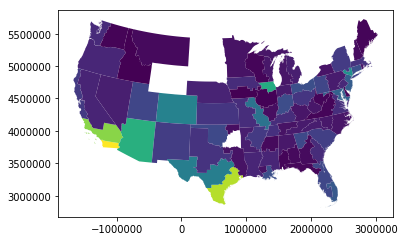

In [62]:
jur_count.plot(column='Count')

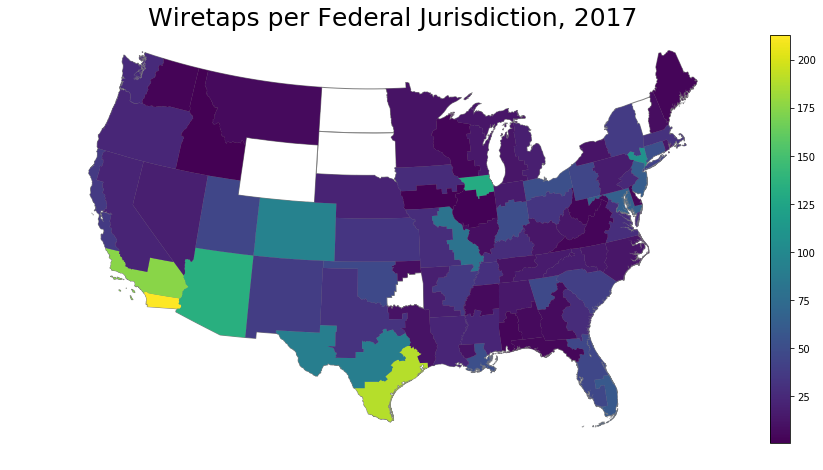

In [63]:
#Add gradient legend
from matplotlib.colors import Normalize
from matplotlib import cm

#Set up figure and axis with different size
f, ax = plt.subplots(1, figsize=(15,15))
#Remove axis
ax.set_axis_off()
#Set title 
ax.set_title('Wiretaps per Federal Jurisdiction, 2017', fontsize=25)
#Add Basemap to axix
jur.plot(ax=ax, color='white', edgecolor='grey')
#Add second layer of polygons on the axis 
jur_count.plot(column='Count', ax=ax, legend=False)

#Add legend
mn = jur_count.Count.min()
mx = jur_count.Count.max()
norm = Normalize(vmin=mn, vmax=mx)
n_cmap = cm.ScalarMappable(norm=norm, cmap="viridis")
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap, ax=ax, orientation='vertical', shrink=.5)

Jurisdictions with lots of wiretaps are in along the US-MX border in Southern California, Texas, and Arizona. Chicago also has a high number of taps. It seems likely that the high frequency of wiretaps in these areas  is related to transnational drug trafficking investigations. 

### Look at number of wiretaps per crime per jurisdiction

In [64]:
jur_tap.reset_index()

Jurisdiction A.O. Number           Judge          Offense  \
0             ALABAMA, MIDDLE      2017-1  ALBRITTON, III        NARCOTICS   
1             ALABAMA, MIDDLE      2017-2  ALBRITTON, III  DRUGS - ILLEGAL   
2             ALABAMA, MIDDLE      2017-3  ALBRITTON, III  DRUGS - ILLEGAL   
3             ALABAMA, MIDDLE      2017-4  ALBRITTON, III  DRUGS - ILLEGAL   
4             ALABAMA, MIDDLE      2017-5  ALBRITTON, III  DRUGS - ILLEGAL   
5             ALABAMA, MIDDLE      2017-6  ALBRITTON, III  DRUGS - ILLEGAL   
6           ALABAMA, NORTHERN      2015-7         HOPKINS        NARCOTICS   
7           ALABAMA, NORTHERN      2015-8         PROCTOR        NARCOTICS   
8           ALABAMA, NORTHERN     2016-17         HAIKALA        NARCOTICS   
9           ALABAMA, NORTHERN     2016-18          BOWDRE        NARCOTICS   
10          ALABAMA, NORTHERN     2016-19         HAIKALA        NARCOTICS   
11          ALABAMA, NORTHERN     2016-20         HAIKALA        NARCOTICS   
12          ALABAMA, NORTHERN      2017-7          BOWDRE  DRUGS - ILLEGAL   
13          ALABAMA, NORTHERN      2017-8         COOGLER  DRUGS - ILLEGAL   
14          ALABAMA, NORTHERN      2017-9         HAIKALA  DRUGS - ILLEGAL   
15          ALABAMA, NORTHERN     2017-10         HOPKINS       CONSPIRACY   
16          ALABAMA, NORTHERN     2017-11         HOPKINS  DRUGS - ILLEGAL   
17          ALABAMA, NORTHERN     2017-12          BOWDRE  DRUGS - ILLEGAL   
18          ALABAMA, NORTHERN     2017-13         HOPKINS  DRUGS - ILLEGAL   
19          ALABAMA, NORTHERN     2017-14          BOWDRE  DRUGS - ILLEGAL   
20          ALABAMA, NORTHERN     2017-15          KALLON  DRUGS - ILLEGAL   
21          ALABAMA, SOUTHERN     2016-19          DUBOSE        NARCOTICS   
22          ALABAMA, SOUTHERN      2017-2          STEELE  DRUGS - ILLEGAL   
23          ALABAMA, SOUTHERN      2017-3          STEELE  DRUGS - ILLEGAL   
24          ALABAMA, SOUTHERN      2017-4          DUBOSE  DRUGS - ILLEGAL   
25                    ARIZONA    2014-217         COLLINS        NARCOTICS   
26                    ARIZONA    2015-283          ZAPATA        NARCOTICS   
27                    ARIZONA    2015-284          ZAPATA        NARCOTICS   
28                    ARIZONA    2015-285           LOGAN            FRAUD   
29                    ARIZONA    2016-351        HUMETEWA        NARCOTICS   
...                       ...         ...             ...              ...   
2922  WEST VIRGINIA, SOUTHERN      2017-4        CHAMBERS        NARCOTICS   
2923  WEST VIRGINIA, SOUTHERN      2017-5        CHAMBERS  DRUGS - ILLEGAL   
2924  WEST VIRGINIA, SOUTHERN      2017-6        CHAMBERS  DRUGS - ILLEGAL   
2925  WEST VIRGINIA, SOUTHERN      2017-7        CHAMBERS  DRUGS - ILLEGAL   
2926  WEST VIRGINIA, SOUTHERN      2017-8        CHAMBERS  DRUGS - ILLEGAL   
2927  WEST VIRGINIA, SOUTHERN      2017-9        CHAMBERS  DRUGS - ILLEGAL   
2928  WEST VIRGINIA, SOUTHERN     2017-10        CHAMBERS  DRUGS - ILLEGAL   
2929  WEST VIRGINIA, SOUTHERN     2017-11        CHAMBERS  DRUGS - ILLEGAL   
2930  WEST VIRGINIA, SOUTHERN     2017-12        CHAMBERS  DRUGS - ILLEGAL   
2931  WEST VIRGINIA, SOUTHERN     2017-13        CHAMBERS  DRUGS - ILLEGAL   
2932  WEST VIRGINIA, SOUTHERN     2017-14        CHAMBERS  DRUGS - ILLEGAL   
2933       WISCONSIN, EASTERN      2017-1         ADELMAN        NARCOTICS   
2934       WISCONSIN, EASTERN      2017-2         ADELMAN        NARCOTICS   
2935       WISCONSIN, EASTERN      2017-3          PEPPER        NARCOTICS   
2936       WISCONSIN, EASTERN      2017-4         ADELMAN        NARCOTICS   
2937       WISCONSIN, EASTERN      2017-5         ADELMAN        NARCOTICS   
2938       WISCONSIN, EASTERN      2017-6          PEPPER        NARCOTICS   
2939       WISCONSIN, EASTERN      2017-7         ADELMAN        NARCOTICS   
2940       WISCONSIN, EASTERN      2017-8         ADELMAN        NARCOTICS   
2941       WISCONSIN, EASTERN      2017

In [65]:
# new dataframe that shows wiretap counts per offense, grouped by federal jurisdiction
jt = pd.DataFrame(jur_tap.groupby('Jurisdiction').Offense.value_counts())
jt.head()

Offense
Jurisdiction      Offense                 
ALABAMA, MIDDLE   DRUGS - ILLEGAL        5
                  NARCOTICS              1
ALABAMA, NORTHERN DRUGS - ILLEGAL        8
                  NARCOTICS              6
                  CONSPIRACY             1

In [66]:
jt = jt.rename(columns={'Offense': 'Count'})
jt = jt.reset_index()
jt = pd.merge(jt, jur, left_on= 'Jurisdiction', right_on= 'DISTRICT')
jt.head()

Jurisdiction          Offense  Count  FID ABBR           DISTRICT  \
0    ALABAMA, MIDDLE  DRUGS - ILLEGAL      5    1  ALM    ALABAMA, MIDDLE   
1    ALABAMA, MIDDLE        NARCOTICS      1    1  ALM    ALABAMA, MIDDLE   
2  ALABAMA, NORTHERN  DRUGS - ILLEGAL      8    2  ALN  ALABAMA, NORTHERN   
3  ALABAMA, NORTHERN        NARCOTICS      6    2  ALN  ALABAMA, NORTHERN   
4  ALABAMA, NORTHERN       CONSPIRACY      1    2  ALN  ALABAMA, NORTHERN   

    SQ_Miles  Shape_Leng  Shape_Area District_N    Shape__Are    Shape__Len  \
0  15571.036    9.918902    3.851034         11  5.634653e+10  1.200787e+06   
1  15571.036    9.918902    3.851034         11  5.634653e+10  1.200787e+06   
2  22792.411   12.526683    5.752874         11  8.590670e+10  1.525150e+06   
3  22792.411   12.526683    5.752874         11  8.590670e+10  1.525150e+06   
4  22792.411   12.526683    5.752874         11  8.590670e+10  1.525150e+06   

                                            geometry  
0  POLYGON ((1773231.512352986 3791067.418154876,...  
1  POLYGON ((1773231.512352986 3791067.418154876,...  
2  POLYGON ((1489037.117957535 3927953.039866449,...  
3  POLYGON ((1489037.117957535 3927953.039866449,...  
4  POLYGON ((1489037.117957535 3927953.039866449,...

In [67]:
jt = gpd.GeoDataFrame(jt)

In [68]:
#Plot the Count per jurisdiction for a specific Offense

def off_count(df=jt, offense='Offense'):
    
    d = jt.loc[jt['Offense'] == offense]

    #Set up figure and axis with different size
    f, ax = plt.subplots(1, figsize=(15,15))
    #Remove axis
    ax.set_axis_off()
    #Set title 
    ax.set_title('2017 Wiretaps for Crime Type: ' + offense, fontsize=25)
    #Add baselayer
    jur.plot(ax=ax, color='white', edgecolor='grey')
    #Add second layer of polygons on the axis
    d.plot(column='Count', ax=ax, legend=False)
    #Add legend
    mn = d.Count.min()
    mx = d.Count.max()
    norm = Normalize(vmin=mn, vmax=mx)
    n_cmap = cm.ScalarMappable(norm=norm, cmap="viridis")
    n_cmap.set_array([])
    ax.get_figure().colorbar(n_cmap, ax=ax, orientation='vertical', shrink=.5)
    #Display
    plt.show()

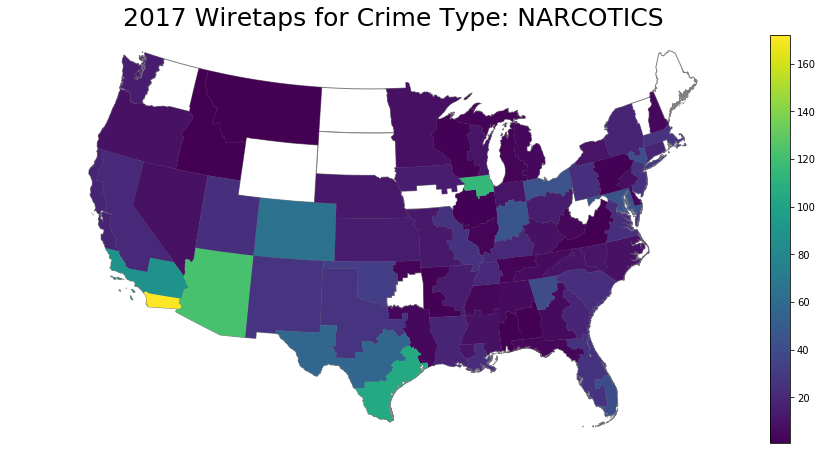

In [69]:
off_count(offense='NARCOTICS')

In [70]:
jt.Offense.unique()

array(['DRUGS - ILLEGAL', 'NARCOTICS', 'CONSPIRACY', 'OTHER',
       'IMMIGRATION', 'FRAUD', 'SMUGGLING', 'RACKETEERING', 'BRIBERY',
       'POSSESSION', 'USURY', 'FIREARMS', 'LOANSHARKING', '$LAUNDERING',
       'CORRUPTION', 'DRUGS - PRESCRIPTION', 'TERRORISM', 'GAMBLING',
       'BOMBING', 'CIVIL RIGHTS', 'MURDER', 'KIDNAPPING', 'ROBBERY',
       'ASSAULT', 'EXTORTION', 'EMBEZZLEMENT', 'COERCION', 'THEFT'],
      dtype=object)

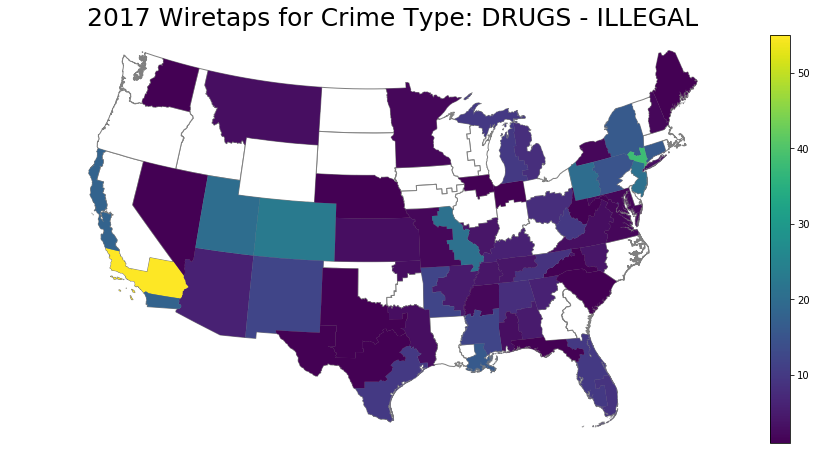

In [71]:
off_count(offense='DRUGS - ILLEGAL')

_Note: Should combine narcotics and drugs - illegal for final report_

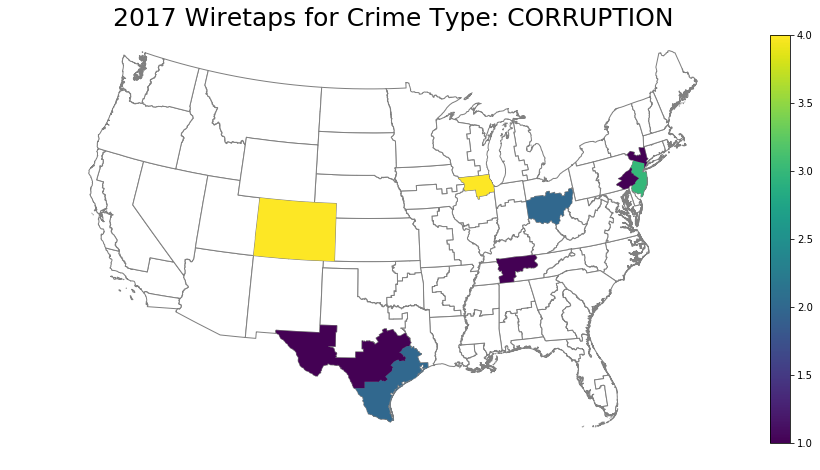

In [72]:
off_count(offense='CORRUPTION')

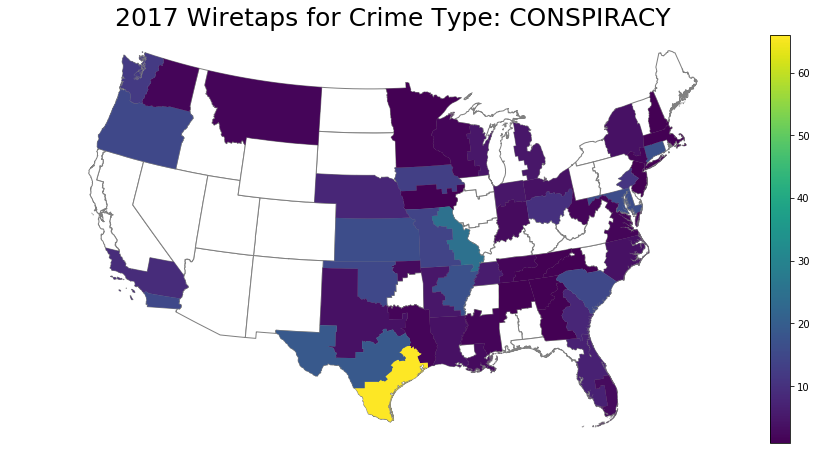

In [73]:
off_count(offense='CONSPIRACY')

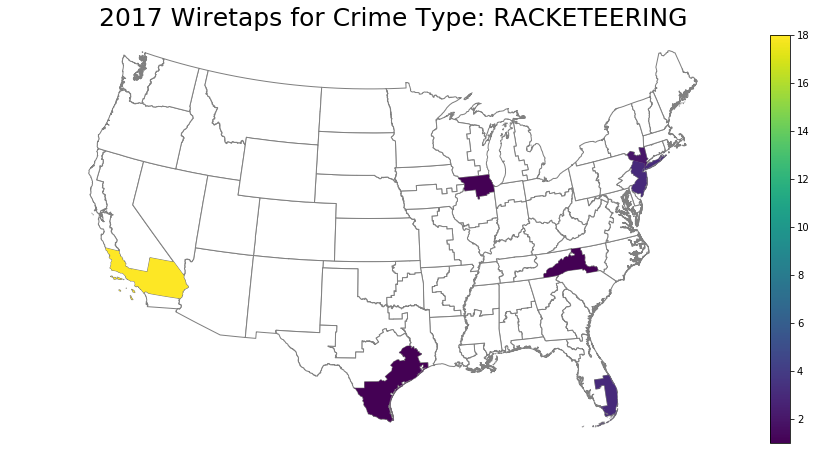

In [74]:
off_count(offense='RACKETEERING')

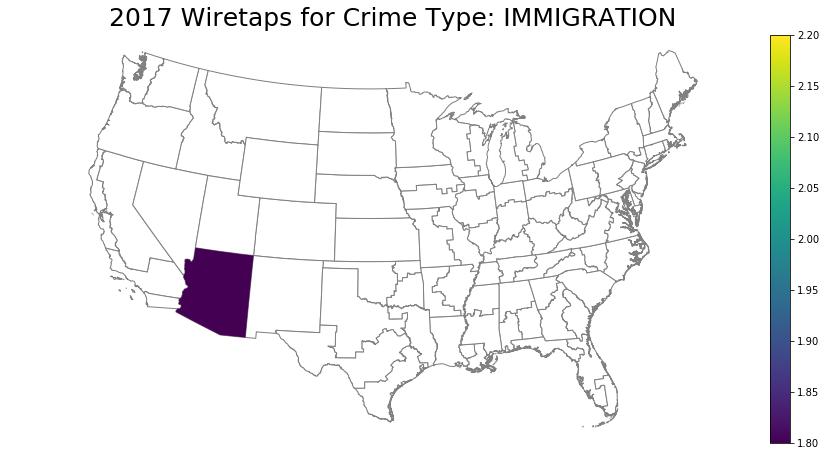

In [75]:
off_count(offense='IMMIGRATION')

Interesting that Arizona is the only Federal Jurisdiction ordering wiretaps for the "crime" of immigration. This is not entirely surprising given the state's aggressive law enforcement approach to illegal immigration*, even though these wiretaps were ordered by federal, not state, law enforcement. Perhaps there is some coordination between federal and state law enforcement in Arizona on this issue, or perhaps the wiretap order simply reflects the state's high levels of immigration. 

*See pages 40-44 of Karla McKanders (2017) "The Subnational Response: Local Intervention in Immigration Policy and Enforcement" in Steven Bender and William Arrocha (eds.), _Compassionate Migration and Regional Policy in the Americas_, New York: Palgrave Macmillan. 

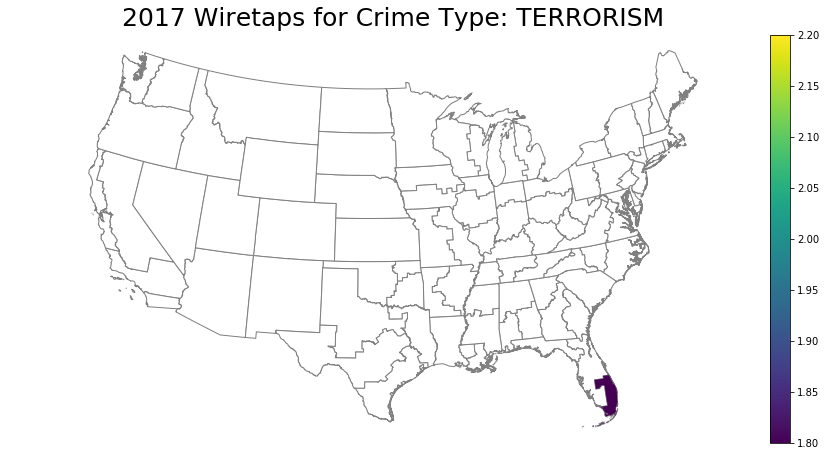

In [76]:
off_count(offense='TERRORISM')

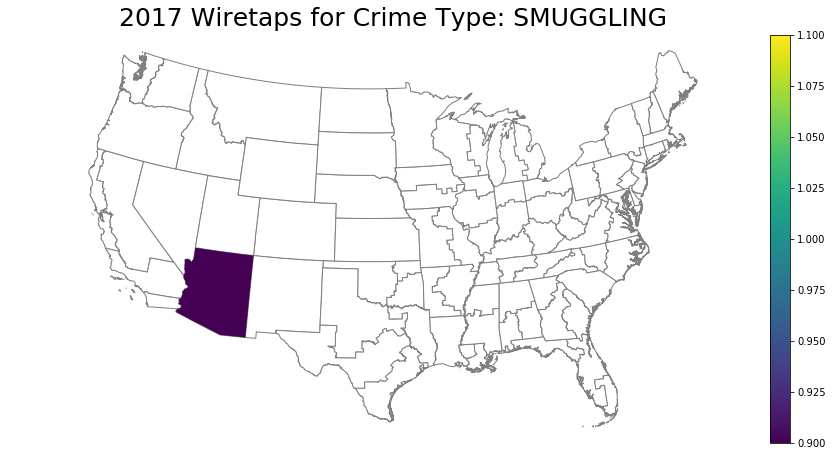

In [77]:
off_count(offense='SMUGGLING')

See comment above regarding immigration policy in Arizona. Wiretaps for the "crime" of smuggling may be related to US legislative efforts to criminalize immigrants by framing immigration as a form of human smuggling. See p. 10 of Susan Martin (2013), "US Immigration Reform," James A. Baker III Institute for Public Policy.

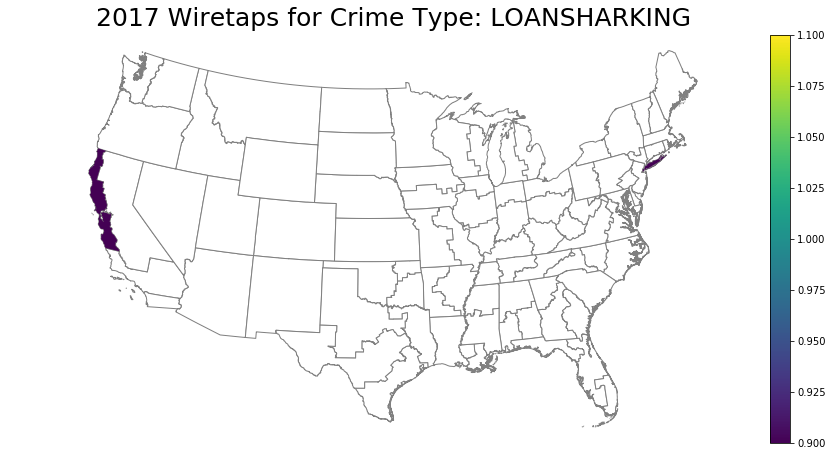

In [78]:
off_count(offense='LOANSHARKING')

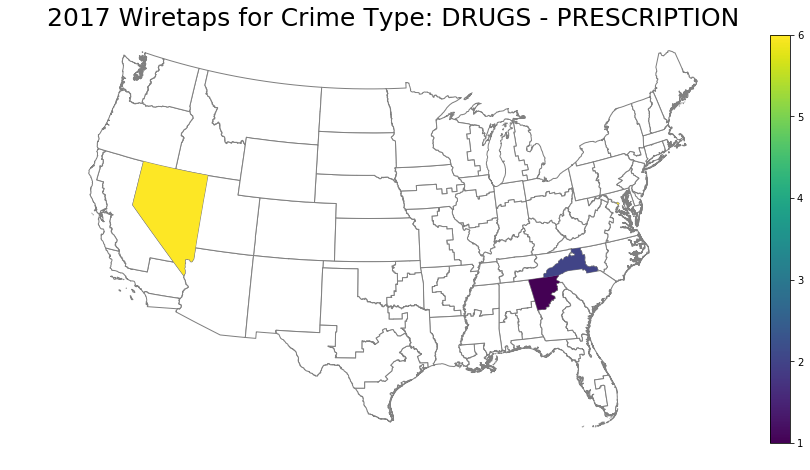

In [79]:
off_count(offense='DRUGS - PRESCRIPTION')

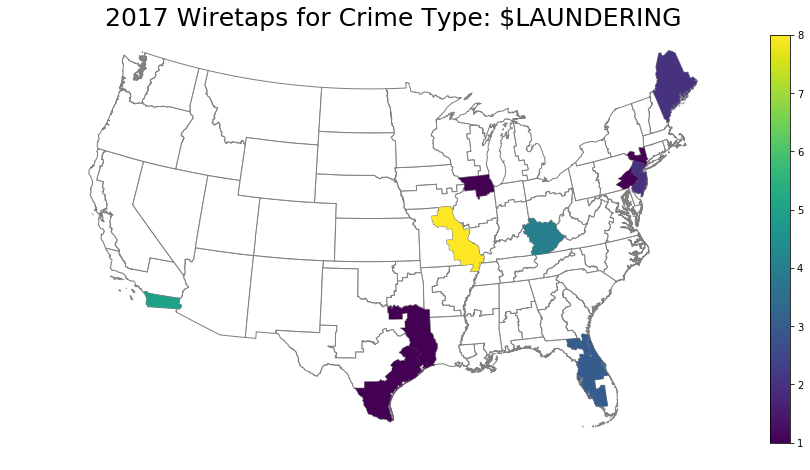

In [80]:
off_count(offense='$LAUNDERING')

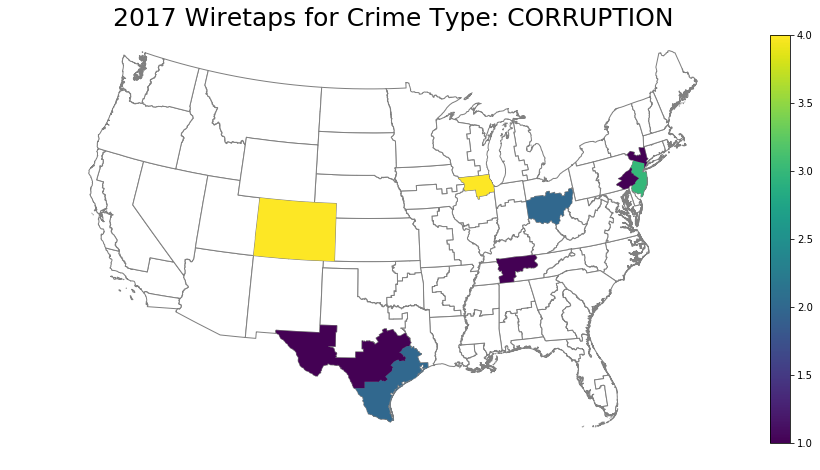

In [81]:
off_count(offense='CORRUPTION')

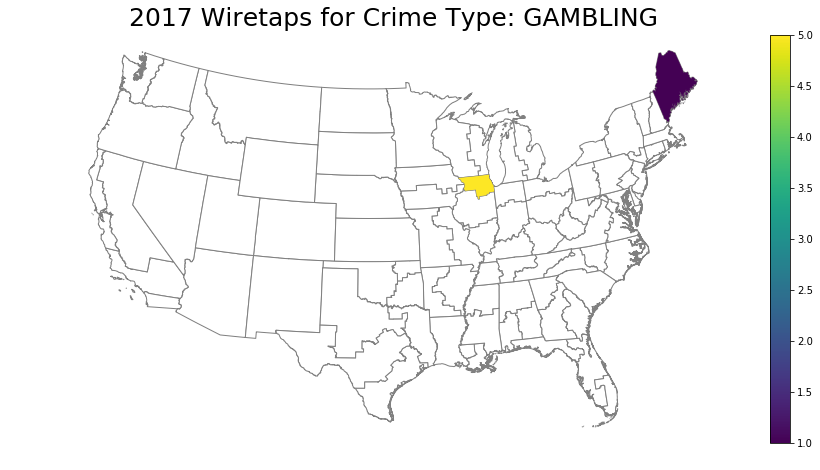

In [82]:
off_count(offense='GAMBLING')

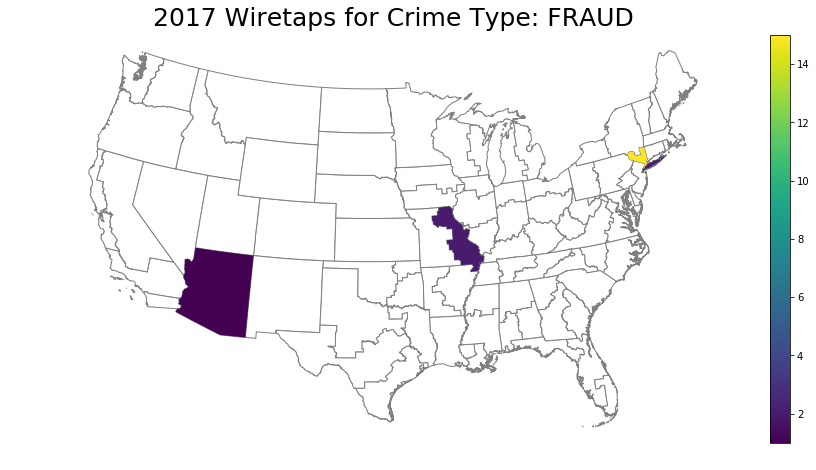

In [83]:
off_count(offense='FRAUD')

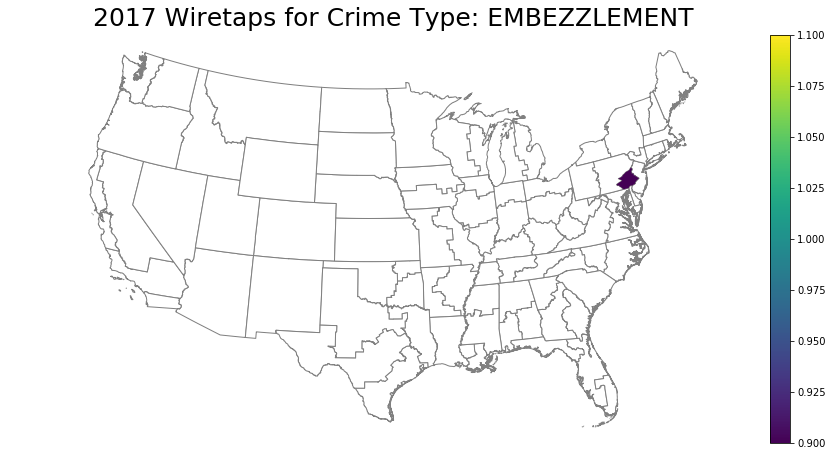

In [84]:
off_count(offense='EMBEZZLEMENT')

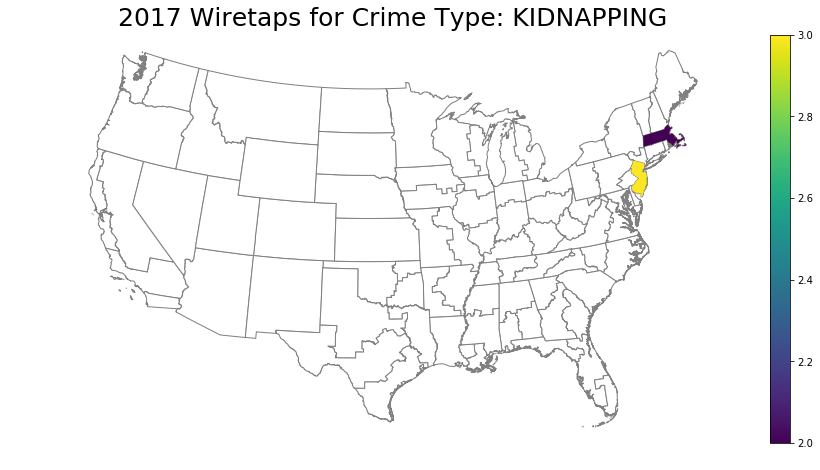

In [85]:
off_count(offense='KIDNAPPING')

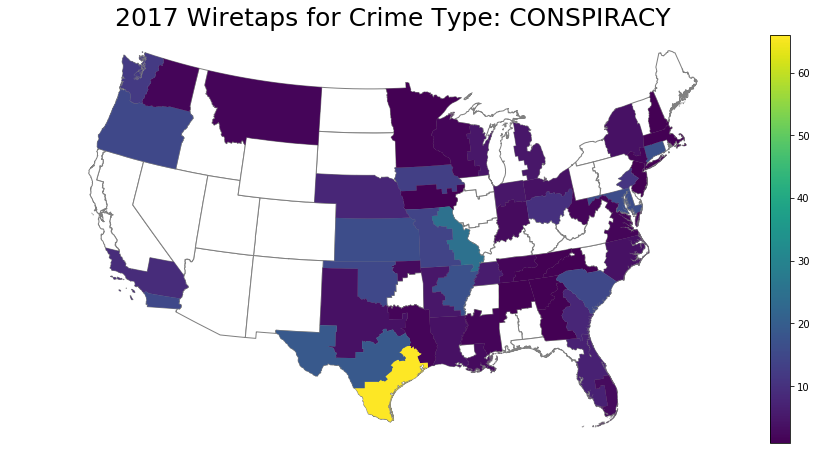

In [86]:
off_count(offense='CONSPIRACY')

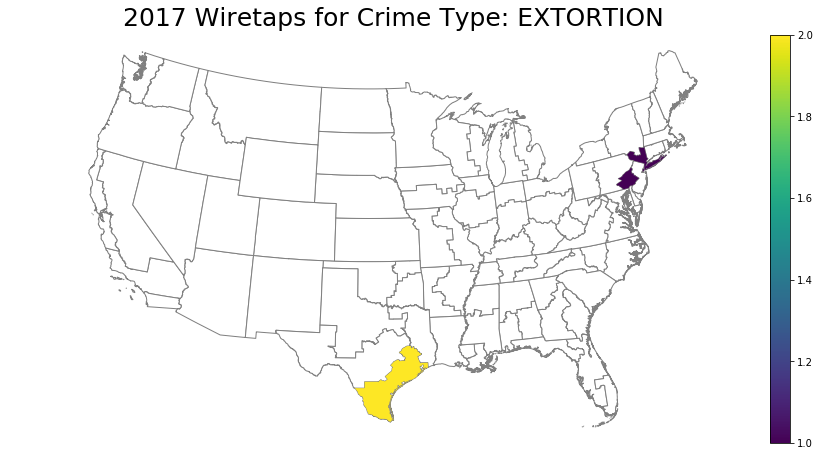

In [87]:
off_count(offense='EXTORTION')

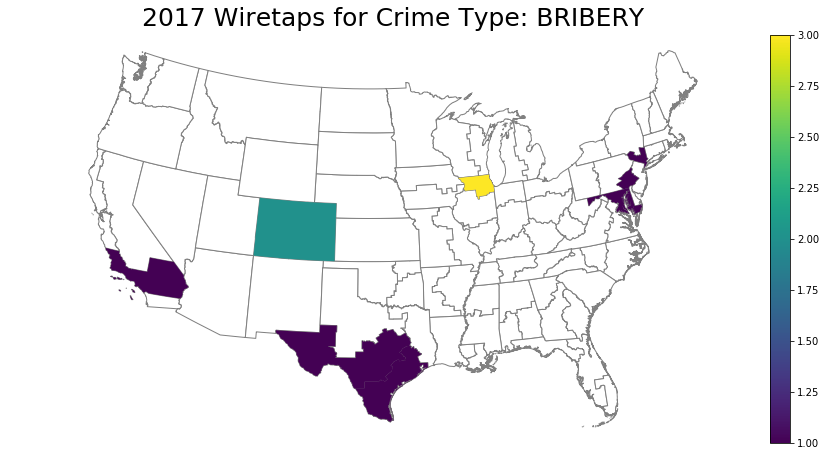

In [88]:
off_count(offense='BRIBERY')

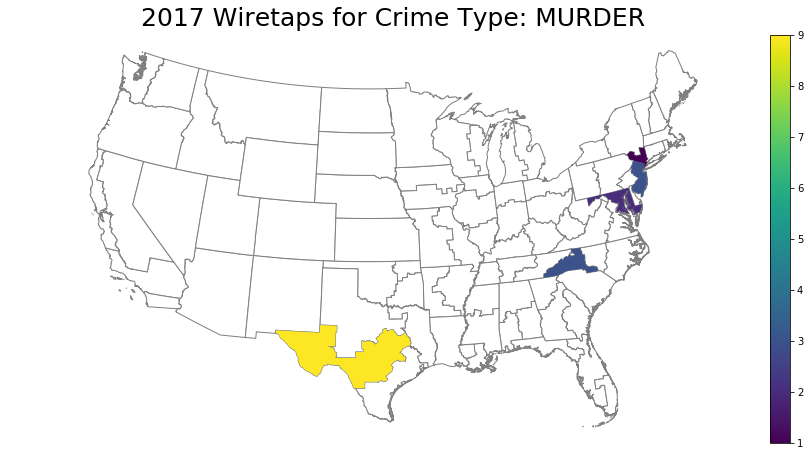

In [89]:
off_count(offense='MURDER')

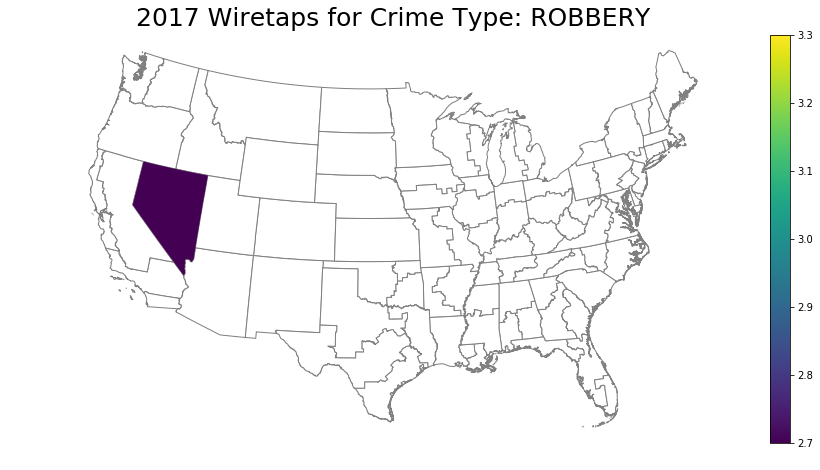

In [90]:
off_count(offense='ROBBERY')

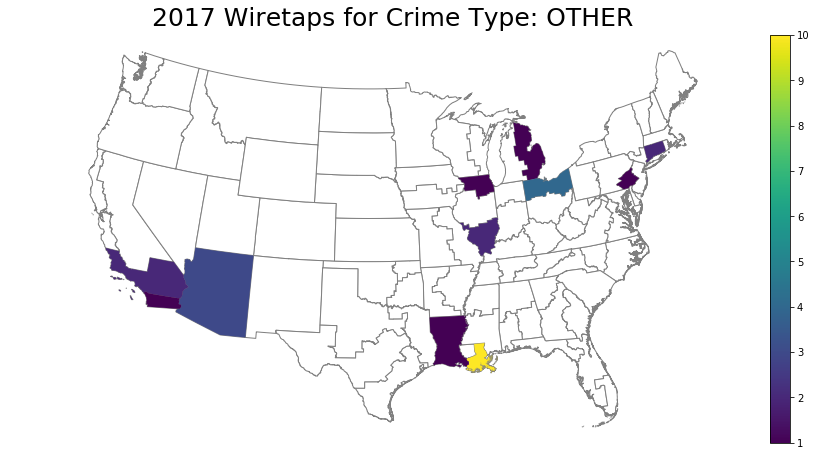

In [91]:
off_count(offense='OTHER')

### Look at only taps for which prosecutor reports were filed

In [92]:
j = jur_tap.loc[jur_tap['Installation'] == 'INSTALLED AND USED']

In [93]:
j.reset_index(inplace=True)

In [94]:
j.describe()

Original Order (Days)  Number of Extensions  Total Length (Days)  \
count            1692.000000           1692.000000          1692.000000   
mean               29.987589              0.540189            46.193262   
std                 0.510527              1.077776            32.343530   
min                 9.000000              0.000000             9.000000   
25%                30.000000              0.000000            30.000000   
50%                30.000000              0.000000            30.000000   
75%                30.000000              1.000000            60.000000   
max                30.000000             16.000000           510.000000   

       Number of Days in Operation  Avg. Intercepts Per Day      Arrests  \
count                  1685.000000              1657.000000  1596.000000   
mean                     42.049852               420.933615     2.381579   
std                      33.363842             12663.472661     7.421253   
min                       0.000000                 0.000000     0.000000   
25%                      29.000000                 2.000000     0.000000   
50%                      30.000000                34.000000     0.000000   
75%                      58.000000               116.000000     0.000000   
max                     510.000000            515477.000000   130.000000   

            Trials  Motions Granted  Motions Denied  Motions Pending  \
count  1582.000000      1584.000000     1584.000000      1584.000000   
mean      0.018331         0.047980        0.024621         0.001263   
std       0.322534         1.247703        0.648649         0.035522   
min       0.000000         0.000000        0.000000         0.000000   
25%       0.000000         0.000000        0.000000         0.000000   
50%       0.000000         0.000000        0.000000         0.000000   
75%       0.000000         0.000000        0.000000         0.000000   
max      11.000000        40.000000       25.000000         1.000000   

       Persons Convicted         year        month          FID  \
count        1582.000000  1692.000000  1692.000000  1692.000000   
mean            0.368521  2016.051418     6.361702    42.651300   
std             2.974502     1.154152     3.294049    28.541692   
min             0.000000  2010.000000     1.000000     1.000000   
25%             0.000000  2016.000000     4.000000    12.000000   
50%             0.000000  2016.000000     6.000000    39.000000   
75%             0.000000  2017.000000     9.000000    71.000000   
max            70.000000  2017.000000    12.000000    92.000000   

            SQ_Miles   Shape_Leng   Shape_Area    Shape__Are    Shape__Len  
count    1692.000000  1692.000000  1692.000000  1.692000e+03  1.692000e+03  
mean    52457.797940    22.357136     8.628810  1.327344e+11  2.724211e+06  
std     51567.312677    13.587962     8.556896  1.320204e+11  1.654207e+06  
min         0.000000     0.716060     0.016194  2.579056e+08  8.913811e+04  
25%     13029.776000     9.870764     2.399556  3.396659e+10  1.190626e+06  
50%     28920.445000    20.766551     5.447175  8.706643e+10  2.557924e+06  
75%     91471.346000    26.857592    10.235889  1.540900e+11  3.173552e+06  
max    254698.639000    56.110728    45.092607  8.204490e+11  7.314555e+06

In [95]:
pd.options.mode.chained_assignment = None

### Look at wiretaps by cost

In [96]:
j.dropna(subset=['Total Cost($)'], inplace=True)

In [97]:
j['Cost'] = j['Total Cost($)'].str.replace(',','')

In [98]:
j['Cost'] = pd.to_numeric(j['Cost'])

In [99]:
#How many observations have a cost of 0?
j.loc[j['Cost'] == 0].describe()

Original Order (Days)  Number of Extensions  Total Length (Days)  \
count                  212.0            212.000000           212.000000   
mean                    30.0              0.627358            48.820755   
std                      0.0              1.557068            46.712045   
min                     30.0              0.000000            30.000000   
25%                     30.0              0.000000            30.000000   
50%                     30.0              0.000000            30.000000   
75%                     30.0              1.000000            60.000000   
max                     30.0             16.000000           510.000000   

       Number of Days in Operation  Avg. Intercepts Per Day     Arrests  \
count                   212.000000               212.000000  212.000000   
mean                     46.301887                67.004717    0.117925   
std                      47.113591                99.803575    1.717007   
min                       0.000000                 0.000000    0.000000   
25%                      30.000000                 4.000000    0.000000   
50%                      30.000000                24.500000    0.000000   
75%                      60.000000                98.250000    0.000000   
max                     510.000000               596.000000   25.000000   

           Trials  Motions Granted  Motions Denied  Motions Pending  \
count  212.000000       212.000000      212.000000            212.0   
mean     0.004717         0.188679        0.117925              0.0   
std      0.068680         2.747211        1.717007              0.0   
min      0.000000         0.000000        0.000000              0.0   
25%      0.000000         0.000000        0.000000              0.0   
50%      0.000000         0.000000        0.000000              0.0   
75%      0.000000         0.000000        0.000000              0.0   
max      1.000000        40.000000       25.000000              0.0   

       Persons Convicted         year       month         FID       SQ_Miles  \
count         212.000000   212.000000  212.000000  212.000000     212.000000   
mean            0.117925  2016.339623    6.985849   44.476415   41160.988316   
std             1.717007     1.283411    3.241436   25.271875   44563.862115   
min             0.000000  2010.000000    1.000000    2.000000       0.000000   
25%             0.000000  2016.000000    4.000000   18.000000   11070.328500   
50%             0.000000  2017.000000    7.000000   48.500000   22713.272000   
75%             0.000000  2017.000000   10.000000   63.250000   50239.377250   
max            25.000000  2017.000000   12.000000   92.000000  254698.639000   

       Shape_Leng  Shape_Area    Shape__Are    Shape__Len   Cost  
count  212.000000  212.000000  2.120000e+02  2.120000e+02  212.0  
mean    19.366565    7.719140  1.217493e+11  2.381211e+06    0.0  
std     12.490072    7.562906  1.192036e+11  1.511862e+06    0.0  
min      0.716060    0.016194  2.579056e+08  8.913811e+04    0.0  
25%      9.641309    2.642988  4.218177e+10  1.183730e+06    0.0  
50%     15.484555    5.379215  8.706643e+10  1.901579e+06    0.0  
75%     22.031328   10.191407  1.540900e+11  2.708929e+06    0.0  
max     53.719795   28.930993  4.475472e+11  6.556103e+06    0.0

212 observations list a cost of 0. Why might this be? For some cases, perhaps the wiretaps was never deployed. However, we can see from the table above that others were definitely used (see the max values for 'number of extensions,' 'arrests,' etc). In these cases, perhaps the total cost was not yet recorded because the operation was ongoing. Regardless, we will have to drop observations with costs of 0 because they will skew the mean cost.

In [100]:
#drop values where cost is 0: these were likely not deployed at all
j = j[j['Cost'] != 0]

In [101]:
j.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1691
Data columns (total 38 columns):
Jurisdiction                          1337 non-null object
A.O. Number                           1337 non-null object
Judge                                 1337 non-null object
Offense                               1337 non-null object
Type                                  1337 non-null object
Location                              1337 non-null object
Application Date                      1337 non-null datetime64[ns]
Original Order (Days)                 1337 non-null float64
Number of Extensions                  1337 non-null float64
Total Length (Days)                   1337 non-null float64
Installation                          1337 non-null object
Number of Days in Operation           1337 non-null float64
Avg. Intercepts Per Day               1319 non-null float64
Number of Persons Intercepts          1311 non-null object
Number of Intercepts                  1319 non-null ob

In [102]:
p = pd.DataFrame(j.groupby('Jurisdiction')['Cost'].mean())
p.head()

Cost
Jurisdiction                    
ALABAMA, MIDDLE    269859.000000
ALABAMA, NORTHERN   67802.000000
ALABAMA, SOUTHERN   26392.000000
ARIZONA            109178.291667
ARKANSAS, EASTERN   33835.000000

In [103]:
p = p.reset_index()

In [104]:
p = pd.merge(p, jur, left_on= 'Jurisdiction', right_on= 'DISTRICT')
p.head()

Jurisdiction           Cost  FID ABBR           DISTRICT    SQ_Miles  \
0    ALABAMA, MIDDLE  269859.000000    1  ALM    ALABAMA, MIDDLE   15571.036   
1  ALABAMA, NORTHERN   67802.000000    2  ALN  ALABAMA, NORTHERN   22792.411   
2  ALABAMA, SOUTHERN   26392.000000    3  ALS  ALABAMA, SOUTHERN   36728.698   
3            ARIZONA  109178.291667    5   AZ            ARIZONA  114059.824   
4  ARKANSAS, EASTERN   33835.000000    6  ARE  ARKANSAS, EASTERN   28875.088   

   Shape_Leng  Shape_Area District_N    Shape__Are    Shape__Len  \
0    9.918902    3.851034         11  5.634653e+10  1.200787e+06   
1   12.526683    5.752874         11  8.590670e+10  1.525150e+06   
2   14.291408    3.267182         11  4.755904e+10  1.725692e+06   
3   23.752602   28.930993          9  4.342576e+11  2.888358e+06   
4   20.282134    7.391100          8  1.119305e+11  2.444057e+06   

                                            geometry  
0  POLYGON ((1773231.512352986 3791067.418154876,...  
1  POLYGON ((1489037.117957535 3927953.039866449,...  
2  (POLYGON ((1556659.714021636 3390941.689811857...  
3  POLYGON ((-528566.6197332963 4158168.673864674...  
4  POLYGON ((1245497.465320354 4071327.816416644,...

In [105]:
p.set_index('Jurisdiction', inplace=True)
p.head()

Cost  FID ABBR           DISTRICT    SQ_Miles  \
Jurisdiction                                                                
ALABAMA, MIDDLE    269859.000000    1  ALM    ALABAMA, MIDDLE   15571.036   
ALABAMA, NORTHERN   67802.000000    2  ALN  ALABAMA, NORTHERN   22792.411   
ALABAMA, SOUTHERN   26392.000000    3  ALS  ALABAMA, SOUTHERN   36728.698   
ARIZONA            109178.291667    5   AZ            ARIZONA  114059.824   
ARKANSAS, EASTERN   33835.000000    6  ARE  ARKANSAS, EASTERN   28875.088   

                   Shape_Leng  Shape_Area District_N    Shape__Are  \
Jurisdiction                                                         
ALABAMA, MIDDLE      9.918902    3.851034         11  5.634653e+10   
ALABAMA, NORTHERN   12.526683    5.752874         11  8.590670e+10   
ALABAMA, SOUTHERN   14.291408    3.267182         11  4.755904e+10   
ARIZONA             23.752602   28.930993          9  4.342576e+11   
ARKANSAS, EASTERN   20.282134    7.391100          8  1.119305e+11   

                     Shape__Len  \
Jurisdiction                      
ALABAMA, MIDDLE    1.200787e+06   
ALABAMA, NORTHERN  1.525150e+06   
ALABAMA, SOUTHERN  1.725692e+06   
ARIZONA            2.888358e+06   
ARKANSAS, EASTERN  2.444057e+06   

                                                            geometry  
Jurisdiction                                                          
ALABAMA, MIDDLE    POLYGON ((1773231.512352986 3791067.418154876,...  
ALABAMA, NORTHERN  POLYGON ((1489037.117957535 3927953.039866449,...  
ALABAMA, SOUTHERN  (POLYGON ((1556659.714021636 3390941.689811857...  
ARIZONA            POLYGON ((-528566.6197332963 4158168.673864674...  
ARKANSAS, EASTERN  POLYGON ((1245497.465320354 4071327.816416644,...

In [106]:
p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, ALABAMA, MIDDLE to WISCONSIN, WESTERN
Data columns (total 11 columns):
Cost          81 non-null float64
FID           81 non-null int64
ABBR          81 non-null object
DISTRICT      81 non-null object
SQ_Miles      81 non-null float64
Shape_Leng    81 non-null float64
Shape_Area    81 non-null float64
District_N    81 non-null object
Shape__Are    81 non-null float64
Shape__Len    81 non-null float64
geometry      81 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 7.6+ KB


In [107]:
p = gpd.GeoDataFrame(p)

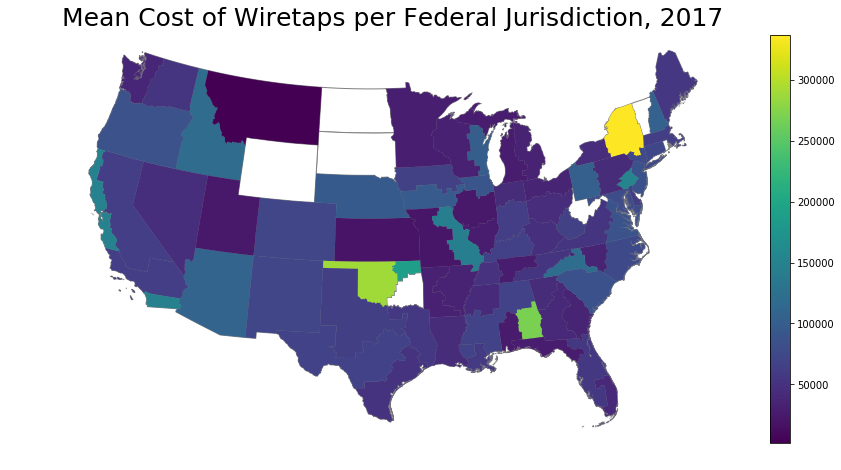

In [108]:
    #Set up figure and axis with different size
    f, ax = plt.subplots(1, figsize=(15,15))
    #Remove axis
    ax.set_axis_off()
    #Set title 
    ax.set_title('Mean Cost of Wiretaps per Federal Jurisdiction, 2017', fontsize=25)
    #Add baselayer
    jur.plot(ax=ax, color='white', edgecolor='grey')
    #Add second layer of polygons on the axis
    p.plot(column='Cost', ax=ax, legend=False)
    #Add legend
    mn = p.Cost.min()
    mx = p.Cost.max()
    norm = Normalize(vmin=mn, vmax=mx)
    n_cmap = cm.ScalarMappable(norm=norm, cmap="viridis")
    n_cmap.set_array([])
    ax.get_figure().colorbar(n_cmap, ax=ax, orientation='vertical', shrink=.5)
    #Display
    plt.show()

### Next Steps

a. Create time series map for that shows change over time per district for at least one variable.

b. Take a closer look at state wiretap records in areas that had lots of federal wiretaps, such as Southern California, Chicago, Texas.

c. It could also be interesting to single out certain outliers that incurred extremely high costs or led to lots of arrests.

d. Develop metrics to evaluate the effectiveness of wiretaps. Which jurisdictions or criminal investigations are getting a "return on their investment?"

## OLS Regression

What factors explain the variation in number of arrests per wiretap?

In [109]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [110]:
j.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1691
Data columns (total 38 columns):
Jurisdiction                          1337 non-null object
A.O. Number                           1337 non-null object
Judge                                 1337 non-null object
Offense                               1337 non-null object
Type                                  1337 non-null object
Location                              1337 non-null object
Application Date                      1337 non-null datetime64[ns]
Original Order (Days)                 1337 non-null float64
Number of Extensions                  1337 non-null float64
Total Length (Days)                   1337 non-null float64
Installation                          1337 non-null object
Number of Days in Operation           1337 non-null float64
Avg. Intercepts Per Day               1319 non-null float64
Number of Persons Intercepts          1311 non-null object
Number of Intercepts                  1319 non-null ob

In [111]:
j.groupby('Arrests').Jurisdiction.count()

Arrests
0.0      909
1.0       64
2.0       36
3.0       44
4.0       23
5.0       19
6.0       16
7.0       17
8.0       20
9.0       12
10.0      11
11.0      13
12.0       8
13.0      10
14.0       8
15.0       7
16.0      10
17.0       5
18.0       4
19.0       2
20.0       7
21.0       2
22.0       2
23.0      12
24.0       1
25.0       2
28.0       1
29.0       2
30.0       1
32.0       1
33.0       1
34.0       2
35.0       1
36.0       3
37.0       1
38.0       2
39.0       1
42.0       1
45.0       1
49.0       1
50.0       1
55.0       4
59.0       1
61.0       1
130.0      1
Name: Jurisdiction, dtype: int64

In [112]:
# Need to drop observations that resulted in no arrests

j1 = j.loc[j['Arrests'] != 0]

In [113]:
j1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428 entries, 0 to 1691
Data columns (total 38 columns):
Jurisdiction                          428 non-null object
A.O. Number                           428 non-null object
Judge                                 428 non-null object
Offense                               428 non-null object
Type                                  428 non-null object
Location                              428 non-null object
Application Date                      428 non-null datetime64[ns]
Original Order (Days)                 428 non-null float64
Number of Extensions                  428 non-null float64
Total Length (Days)                   428 non-null float64
Installation                          428 non-null object
Number of Days in Operation           428 non-null float64
Avg. Intercepts Per Day               410 non-null float64
Number of Persons Intercepts          405 non-null object
Number of Intercepts                  410 non-null object
Number of I

In [114]:
j1['Number of Incriminating Intercepts'] = j1['Number of Incriminating Intercepts'].str.replace(',','')
j1['Number of Incriminating Intercepts'].unique()

array(['830', '331', '1343', '2', '100', '70', '0', '9071', '2947', '119',
       '420', '1257', '362', '6210', '2216', '698', '218', '1774', '5',
       '125', '1467', '1300', '346', '512', '326', '89', '226', '63495',
       '35', '792', '5833', '80', '40', '214', '664', '382', '562', '636',
       '41', '879', '2200', '929', '2893', '7000', '400', '600', '1374',
       '4014', '16', '3096', '1975', '188', '256', '43', '12729', '1568',
       '942', '8379', '8441', '1242', '511', '13', '122', '7627', '4483',
       '844', '1498', '298', '3345', '29', '342', '6224', '4075', '13678',
       '3', '3733', '7057', '19042', '23814', '6297', '1642', '110',
       '2254', '364', '4543', '4359', '2576', '2874', '1473', '84',
       '1463', '700', '909', '3158', '2081', '560', '293', '10', '841',
       '551', '1013', '603', '23', '352', '1838', '552', '457', '892',
       '344', '14304', '1', '4448', '995', '190', '335', '515', '408',
       '697', '2652', '662', '9802', '3259', '1625', '1871

In [115]:
j1['Number of Incriminating Intercepts'] = pd.to_numeric(j1['Number of Incriminating Intercepts'])

In [116]:
j1['Number of Persons Intercepts'] = j1['Number of Persons Intercepts'].str.replace(',','')
j1['Number of Persons Intercepts'] = pd.to_numeric(j1['Number of Persons Intercepts'])

In [125]:
reg = sm.OLS(endog = j1['Arrests'], exog= j1[['Number of Days in Operation', 'Cost']], missing='drop').fit()

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                Arrests   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     154.7
Date:                Thu, 09 May 2019   Prob (F-statistic):           6.91e-50
Time:                        12:48:32   Log-Likelihood:                -1484.2
No. Observations:                 382   AIC:                             2972.
Df Residuals:                     380   BIC:                             2980.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Number of Days in 

In [117]:
reg = sm.OLS(endog = j1['Arrests'], exog= j1[['Number of Days in Operation', 'Cost', 
                                              'Number of Extensions']], missing='drop').fit()

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                Arrests   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     114.0
Date:                Thu, 09 May 2019   Prob (F-statistic):           1.27e-52
Time:                        12:40:29   Log-Likelihood:                -1475.2
No. Observations:                 382   AIC:                             2956.
Df Residuals:                     379   BIC:                             2968.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Number of Days in 

In [118]:
reg = sm.OLS(endog = j1['Arrests'], exog= j1[['Number of Days in Operation', 'Cost', 
                                              'Number of Incriminating Intercepts',
                                              'Number of Extensions']], missing='drop').fit()

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                Arrests   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     67.68
Date:                Thu, 09 May 2019   Prob (F-statistic):           5.36e-43
Time:                        12:40:30   Log-Likelihood:                -1445.0
No. Observations:                 376   AIC:                             2898.
Df Residuals:                     372   BIC:                             2914.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Numb

In [119]:
reg = sm.OLS(endog = j1['Arrests'], exog= j1[['Number of Days in Operation', 'Cost', 
                                              'Number of Incriminating Intercepts',
                                              'Number of Extensions',
                                              'Number of Persons Intercepts']], missing='drop').fit()

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                Arrests   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     50.40
Date:                Thu, 09 May 2019   Prob (F-statistic):           1.37e-39
Time:                        12:40:30   Log-Likelihood:                -1412.2
No. Observations:                 368   AIC:                             2834.
Df Residuals:                     363   BIC:                             2854.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Numb

In [120]:
reg = sm.OLS(endog = j1['Arrests'], exog= j1[['Number of Days in Operation', 'Cost', 
                                              'Number of Incriminating Intercepts',
                                              'Number of Extensions',
                                              'Number of Persons Intercepts',
                                              'Avg. Intercepts Per Day']], missing='drop').fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                Arrests   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     41.45
Date:                Thu, 09 May 2019   Prob (F-statistic):           2.44e-38
Time:                        12:40:30   Log-Likelihood:                -1405.5
No. Observations:                 366   AIC:                             2823.
Df Residuals:                     360   BIC:                             2846.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Numb

According to all of the regression models, the largeest and most significant predictor of number of arrests per wiretap is the number of days in operation. The number of incriminating intercepts has no statstically significant effect, and cost has a negligible positive effect. Oddly, the number of extensions has a negative effect, which would seem to contradict the effect picked up by number of days in operation. 

In [127]:
j1.groupby('Number of Extensions').Jurisdiction.count()

Number of Extensions
0.0    243
1.0    127
2.0     36
3.0     10
4.0      7
5.0      3
6.0      1
8.0      1
Name: Jurisdiction, dtype: int64